# **Final Project 4**
## **1. Perkenalan**

Nama Anggota Kelompok :
1. Muhammad Rafi Ramadhan / PYTN-KS12-002
2. Aurisha Lutvinda Putrian / PYTN-KS12-014
3. Carenina Amanda Putri / PYTN-KS12-017



### 1.1 Latar Belakang

Data cuaca merupakan salah satu data yang penting dalam berbagai bidang seperti pertanian, transportasi, pariwisata, dan sebagainya. Namun, data cuaca tersebut seringkali tidak terorganisir dengan baik sehingga sulit untuk dianalisis. Oleh karena itu, perlu dilakukan pengolahan data agar data cuaca tersebut dapat dimanfaatkan dengan maksimal.

Pada proyek ini, akan dilakukan pengolahan data cuaca dari dataset Weather Dataset Rattle Package yang berisi data cuaca di Australia. Data ini memiliki informasi mengenai cuaca pada hari ini dan prediksi cuaca untuk besok. Data tersebut mencakup variabel seperti suhu, kelembapan, tekanan udara, kecepatan angin, serta informasi apakah akan hujan pada hari ini dan besok.

Dalam proyek ini, akan dilakukan beberapa tahap pengolahan data, seperti pembersihan data, eksplorasi data, serta pembuatan model prediksi untuk memprediksi apakah akan hujan pada besoknya. Dengan melakukan pengolahan data ini, diharapkan data cuaca yang tidak terorganisir dapat diolah menjadi informasi yang lebih berguna dan dapat membantu dalam berbagai bidang.

## 1.2 Objektif
- Mampu memahami konsep Classiﬁcation dengan Logistic Regression dan SVM
-  Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM
-  Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi

## **2. Import Data**
Pada bagian ini menggunakan import library untuk melakukan preproceesing, visualisasi dan modelling


In [193]:
!pip install -U yellowbrick
!pip install xlrd
!pip install autoviz
!pip install pandas-profiling==2.11.0
!pip install pycaret
!pip install umap
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=0a96c498790c15630cabb7e38153d187793b314e8547c95102362852a7536992
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publi

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import folium
import statistics

from sklearn import metrics
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_files, load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix
from nltk import FreqDist, NaiveBayesClassifier
from flask import Flask, request, jsonify, render_template
%matplotlib inline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    PowerTransformer)
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from pycaret.clustering import *
from autoviz.AutoViz_Class import AutoViz_Class
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')


## **3. Data Loading**


## 3.1 Read Dataframe dari source CSV
Memasukkan dataframe, dataframe yang digunakan kali ini adalah dataframe **Weather AUS**, yang kemudian menampilkan data teratas

In [80]:
from google.colab import files
upload = files.upload()

Saving CC GENERAL.csv to CC GENERAL (2).csv


In [99]:
df = pd.read_csv('CC GENERAL.csv')
print(df.shape)
df.head()

(8950, 18)


CUST_ID    BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749      0.818182          95.40           0.00       
1  C10002  3202.467416      0.909091           0.00           0.00       
2  C10003  2495.148862      1.000000         773.17         773.17       
3  C10004  1666.670542      0.636364        1499.00        1499.00       
4  C10005   817.714335      1.000000          16.00          16.00       

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0           95.4               0.000000       0.166667         
1            0.0            6442.945483       0.000000         
2            0.0               0.000000       1.000000         
3            0.0             205.788017       0.083333         
4            0.0               0.000000       0.083333         

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0           0.000000                       0.083333               
1           0.000000                       0.000000               
2           1.000000                       0.000000               
3           0.083333                       0.000000               
4           0.083333                       0.000000               

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0         0.000000                 0               2           1000.0      
1         0.250000                 4               0           7000.0      
2         0.000000                 0              12           7500.0      
3         0.083333                 1               1           7500.0      
4         0.000000                 0               1           1200.0      

    PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084      139.509787        0.000000        12    
1  4103.032597     1072.340217        0.222222        12    
2   622.066742      627.284787        0.000000        12    
3     0.000000             NaN        0.000000        12    
4   678.334763      244.791237        0.000000        12

In [100]:
# Copy dataset original kedalam variabel df_copy
df_ori = df.copy()

In [101]:
df.shape

(8950, 18)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [103]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [104]:
df.describe()

BALANCE    BALANCE_FREQUENCY    PURCHASES   ONEOFF_PURCHASES  \
count   8950.000000     8950.000000      8950.000000     8950.000000     
mean    1564.474828        0.877271      1003.204834      592.437371     
std     2081.531879        0.236904      2136.634782     1659.887917     
min        0.000000        0.000000         0.000000        0.000000     
25%      128.281915        0.888889        39.635000        0.000000     
50%      873.385231        1.000000       361.280000       38.000000     
75%     2054.140036        1.000000      1110.130000      577.405000     
max    19043.138560        1.000000     49039.570000    40761.250000     

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count        8950.000000        8950.000000      8950.000000       
mean          411.067645         978.871112         0.490351       
std           904.338115        2097.163877         0.401371       
min             0.000000           0.000000         0.000000       
25%             0.000000           0.000000         0.083333       
50%            89.000000           0.000000         0.500000       
75%           468.637500        1113.821139         0.916667       
max         22500.000000       47137.211760         1.000000       

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count          8950.000000                    8950.000000             
mean              0.202458                       0.364437             
std               0.298336                       0.397448             
min               0.000000                       0.000000             
25%               0.000000                       0.000000             
50%               0.083333                       0.166667             
75%               0.300000                       0.750000             
max               1.000000                       1.000000             

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count        8950.000000          8950.000000     8950.000000    8949.000000   
mean            0.135144             3.248827       14.709832    4494.449450   
std             0.200121             6.824647       24.857649    3638.815725   
min             0.000000             0.000000        0.000000      50.000000   
25%             0.000000             0.000000        1.000000    1600.000000   
50%             0.000000             0.000000        7.000000    3000.000000   
75%             0.222222             4.000000       17.000000    6500.000000   
max             1.500000           123.000000      358.000000   30000.000000   

         PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE     
count   8950.000000     8637.000000       8950.000000    8950.000000  
mean    1733.143852      864.206542          0.153715      11.517318  
std     2895.063757     2372.446607          0.292499       1.338331  
min        0.000000        0.019163          0.000000       6.000000  
25%      383.276166      169.123707          0.000000      12.000000  
50%      856.901546      312.343947          0.000000      12.000000  
75%     1901.134317      825.485459          0.142857      12.000000  
max    50721.483360    76406.207520          1.000000      12.000000

In [105]:
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6])

## **4. Data Cleaning**

Melakukan pengecekan apakah terdapat missing value, data yang duplikat, tipe data yang kurang tepat, dan data yang null.

In [106]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terlihat bahwa terdapat missing value pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS. Karena pada kolom CREDIT_LIMIT hanya terdapat satu missing value, sehingga dapat dihapus saja. Sedangkan untuk missing value pada kolom MINIMUM_PAYMENTS akan diisi dengan nilai mediannya.

In [107]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
df.head()

CUST_ID    BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749      0.818182          95.40           0.00       
1  C10002  3202.467416      0.909091           0.00           0.00       
2  C10003  2495.148862      1.000000         773.17         773.17       
3  C10004  1666.670542      0.636364        1499.00        1499.00       
4  C10005   817.714335      1.000000          16.00          16.00       

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0           95.4               0.000000       0.166667         
1            0.0            6442.945483       0.000000         
2            0.0               0.000000       1.000000         
3            0.0             205.788017       0.083333         
4            0.0               0.000000       0.083333         

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0           0.000000                       0.083333               
1           0.000000                       0.000000               
2           1.000000                       0.000000               
3           0.083333                       0.000000               
4           0.083333                       0.000000               

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0         0.000000                 0               2           1000.0      
1         0.250000                 4               0           7000.0      
2         0.000000                 0              12           7500.0      
3         0.083333                 1               1           7500.0      
4         0.000000                 0               1           1200.0      

    PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084      139.509787        0.000000        12    
1  4103.032597     1072.340217        0.222222        12    
2   622.066742      627.284787        0.000000        12    
3     0.000000      312.343947        0.000000        12    
4   678.334763      244.791237        0.000000        12

In [108]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Karena sudah tidak terdapat missing value, maka akan dicek apakah terdapat data yang duplikat pada dataset.

In [109]:
df.duplicated().sum()

0

Didapatkan jika tidak terdapat data yang duplikat. Akan dilakukan penghapusan pada kolom CUST_ID karena kolom tersebut berisi identitas untuk pemegang kartu kredit yang tidak dibutuhkan dalam analisis data.

In [110]:
df = df.drop('CUST_ID', axis=1)
df.head()

BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749      0.818182          95.40           0.00       
1  3202.467416      0.909091           0.00           0.00       
2  2495.148862      1.000000         773.17         773.17       
3  1666.670542      0.636364        1499.00        1499.00       
4   817.714335      1.000000          16.00          16.00       

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0           95.4               0.000000       0.166667         
1            0.0            6442.945483       0.000000         
2            0.0               0.000000       1.000000         
3            0.0             205.788017       0.083333         
4            0.0               0.000000       0.083333         

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0           0.000000                       0.083333               
1           0.000000                       0.000000               
2           1.000000                       0.000000               
3           0.083333                       0.000000               
4           0.083333                       0.000000               

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0         0.000000                 0               2           1000.0      
1         0.250000                 4               0           7000.0      
2         0.000000                 0              12           7500.0      
3         0.083333                 1               1           7500.0      
4         0.000000                 0               1           1200.0      

    PAYMENTS    MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084      139.509787        0.000000        12    
1  4103.032597     1072.340217        0.222222        12    
2   622.066742      627.284787        0.000000        12    
3     0.000000      312.343947        0.000000        12    
4   678.334763      244.791237        0.000000        12

In [111]:
#Mengubah nama pada atribut agar lebih mudah dipahami
df = df.rename(columns={'BALANCE':'Saldo', 'BALANCE_FREQUENCY':'FrekuensiSaldo', 'PURCHASES':'Pembelian',
                        'ONEOFF_PURCHASES':'PembelianOneoff', 'INSTALLMENTS_PURCHASES':'PembelianAngsuran',
                        'CASH_ADVANCE':'PenarikanTunai', 'PURCHASES_FREQUENCY':'FrekuensiPembelian',
                        'ONEOFF_PURCHASES_FREQUENCY':'FrekuensiPembelianOneoff',
                        'PURCHASES_INSTALLMENTS_FREQUENCY':'FrekuensiPembelianAngsuran',
                        'CASH_ADVANCE_FREQUENCY':'FrekuensiPenarikanTunai', 'CASH_ADVANCE_TRX':'PenarikanTunaiTRX',
                        'PURCHASES_TRX':'PembelianTRX', 'CREDIT_LIMIT':'BatasKredit', 'PAYMENTS':'Pembayaran',
                        'MINIMUM_PAYMENTS':'MinimalPembayaran', 'PRC_FULL_PAYMENT':'PembayaranFullPRC',
                        'TENURE':'JangkaWaktu'})

df.head()

Saldo     FrekuensiSaldo  Pembelian  PembelianOneoff  PembelianAngsuran  \
0    40.900749     0.818182        95.40          0.00            95.4          
1  3202.467416     0.909091         0.00          0.00             0.0          
2  2495.148862     1.000000       773.17        773.17             0.0          
3  1666.670542     0.636364      1499.00       1499.00             0.0          
4   817.714335     1.000000        16.00         16.00             0.0          

   PenarikanTunai  FrekuensiPembelian  FrekuensiPembelianOneoff  \
0       0.000000        0.166667               0.000000           
1    6442.945483        0.000000               0.000000           
2       0.000000        1.000000               1.000000           
3     205.788017        0.083333               0.083333           
4       0.000000        0.083333               0.083333           

   FrekuensiPembelianAngsuran  FrekuensiPenarikanTunai  PenarikanTunaiTRX  \
0           0.083333                  0.000000                  0           
1           0.000000                  0.250000                  4           
2           0.000000                  0.000000                  0           
3           0.000000                  0.083333                  1           
4           0.000000                  0.000000                  0           

   PembelianTRX  BatasKredit  Pembayaran   MinimalPembayaran  \
0        2         1000.0      201.802084      139.509787      
1        0         7000.0     4103.032597     1072.340217      
2       12         7500.0      622.066742      627.284787      
3        1         7500.0        0.000000      312.343947      
4        1         1200.0      678.334763      244.791237      

   PembayaranFullPRC  JangkaWaktu  
0      0.000000           12       
1      0.222222           12       
2      0.000000           12       
3      0.000000           12       
4      0.000000           12

In [112]:
df.columns

Index(['Saldo', 'FrekuensiSaldo', 'Pembelian', 'PembelianOneoff',
       'PembelianAngsuran', 'PenarikanTunai', 'FrekuensiPembelian',
       'FrekuensiPembelianOneoff', 'FrekuensiPembelianAngsuran',
       'FrekuensiPenarikanTunai', 'PenarikanTunaiTRX', 'PembelianTRX',
       'BatasKredit', 'Pembayaran', 'MinimalPembayaran', 'PembayaranFullPRC',
       'JangkaWaktu'],
      dtype='object')

## **5. EDA**

In [114]:
df.head()

Saldo     FrekuensiSaldo  Pembelian  PembelianOneoff  PembelianAngsuran  \
0    40.900749     0.818182        95.40          0.00            95.4          
1  3202.467416     0.909091         0.00          0.00             0.0          
2  2495.148862     1.000000       773.17        773.17             0.0          
3  1666.670542     0.636364      1499.00       1499.00             0.0          
4   817.714335     1.000000        16.00         16.00             0.0          

   PenarikanTunai  FrekuensiPembelian  FrekuensiPembelianOneoff  \
0       0.000000        0.166667               0.000000           
1    6442.945483        0.000000               0.000000           
2       0.000000        1.000000               1.000000           
3     205.788017        0.083333               0.083333           
4       0.000000        0.083333               0.083333           

   FrekuensiPembelianAngsuran  FrekuensiPenarikanTunai  PenarikanTunaiTRX  \
0           0.083333                  0.000000                  0           
1           0.000000                  0.250000                  4           
2           0.000000                  0.000000                  0           
3           0.000000                  0.083333                  1           
4           0.000000                  0.000000                  0           

   PembelianTRX  BatasKredit  Pembayaran   MinimalPembayaran  \
0        2         1000.0      201.802084      139.509787      
1        0         7000.0     4103.032597     1072.340217      
2       12         7500.0      622.066742      627.284787      
3        1         7500.0        0.000000      312.343947      
4        1         1200.0      678.334763      244.791237      

   PembayaranFullPRC  JangkaWaktu  
0      0.000000           12       
1      0.222222           12       
2      0.000000           12       
3      0.000000           12       
4      0.000000           12

## Menentukan pembayaran minimal dan maksimal pada jangka waktu layanan kartu kredit pengguna selama 12 bulan

In [120]:
df.loc[df['JangkaWaktu'] == 12, 'Pembayaran'].agg(('min', 'max'))

min        0.00000
max    50721.48336
Name: Pembayaran, dtype: float64

Dari hasil tersebut diketahui bahwa dalam jangka waktu layanan kartu kredit pengguna selama 12 bulan memiliki pembayaran minimal 0 dan pembayaran maksimal sebesar 49039.57 atau sekitar 49039.

In [124]:
#Mencari Penarikan Tunai terbesar dan terkecil
df.max(axis=0)['PenarikanTunai']


47137.21176

In [125]:
df.min(axis=0)['PenarikanTunai']

0.0

diketahui penarikan tunai terbesar yaitu 47137.21176 dan penarikan tunai terkecil yaitu 0

In [127]:
#Melihat proporsi data pada kolom Jangka Waktu dan Frekuensi Saldo dengan menggunakan crosstab
pd.crosstab(df.JangkaWaktu, df.FrekuensiSaldo)

FrekuensiSaldo  0.000000  0.090909  0.100000  0.111111  0.125000  0.142857  \
JangkaWaktu                                                                  
6                   0         0         0         0         0         0      
7                   3         0         0         0         0         7      
8                   1         0         0         0         9         0      
9                   2         0         0         5         0         0      
10                  1         0         8         0         0         0      
11                  3         0         0         0         0         0      
12                 70        67         0         0         0         0      

FrekuensiSaldo  0.166667  0.181818  0.200000  0.222222  0.250000  0.272727  \
JangkaWaktu                                                                  
6                   6          0        0         0         0          0     
7                   0          0        0         0         0          0     
8                   0          0        0         0         8          0     
9                   0          0        0         5         0          0     
10                  0          0        9         0         0          0     
11                  0          5        0         0         0          8     
12                  0        141        0         0         0        143     

FrekuensiSaldo  0.285714  0.300000  0.333333  0.363636  0.375000  0.400000  \
JangkaWaktu                                                                  
6                   0         0        14          0        0         0      
7                   8         0         0          0        0         0      
8                   0         0         0          0        9         0      
9                   0         0         8          0        0         0      
10                  0         9         0          0        0        10      
11                  0         0         0          9        0         0      
12                  0         0         0        161        0         0      

FrekuensiSaldo  0.428571  0.444444  0.454545  0.500000  0.545455  0.555556  \
JangkaWaktu                                                                  
6                   0         0          0       16          0        0      
7                   5         0          0        0          0        0      
8                   0         0          0       13          0        0      
9                   0         7          0        0          0       10      
10                  0         0          0       11          0        0      
11                  0         0          6        0         15        0      
12                  0         0        166        0        204        0      

FrekuensiSaldo  0.571429  0.600000  0.625000  0.636364  0.666667  0.700000  \
JangkaWaktu                                                                  
6                   0         0         0          0       28         0      
7                  19         0         0          0        0         0      
8                   0         0        11          0        0         0      
9                   0         0         0          0        9         0      
10                  0         6         0          0        0        13      
11                  0         0         0          7        0         0      
12                  0         0         0        202        0         0      

FrekuensiSaldo  0.714286  0.727273  0.750000  0.777778  0.800000  0.818182  \
JangkaWaktu                                                                  
6                   0          0        0         0         0          0     
7                  15          0        0         0         0          0     
8                   0          0       17         0         0          0     
9                   0          0        0        22         0          0     
10               

In [128]:
#Mengidentifikasi rata-rata (mean) Pembelian dengan melakukan grouping berdasarkan Jangka Waktu.
df_mean = df[['JangkaWaktu','Pembelian']].groupby('JangkaWaktu').mean().sort_values(by='Pembelian', ascending=False)
df_mean.T

JangkaWaktu      12           10          11          9           8       \
Pembelian    1088.192402  676.631271  571.222411  540.138171  468.858929   

JangkaWaktu      6           7       
Pembelian    446.128571  424.559421

Dapat dilihat Jangka waktu layanan kartu kredit untuk pengguna 12 bulan memiliki rata-rata pembelian terbesar yaitu 1088.192402 dan Jangka waktu layanan kartu kredit untuk pengguna 7 bulan memiliki rata-rata pembelian terkecil yaitu 424.559421

In [129]:
#Melihat data histori top 5 record dengan melakukan query
df[
    (df['JangkaWaktu'] == 12) &
    (df['Saldo'] == 0.0) &
    (df['Pembelian'] == 0.0)
].head()

Saldo  FrekuensiSaldo  Pembelian  PembelianOneoff  PembelianAngsuran  \
654    0.0         0.0          0.0           0.0               0.0          
4021   0.0         0.0          0.0           0.0               0.0          
5107   0.0         0.0          0.0           0.0               0.0          
6052   0.0         0.0          0.0           0.0               0.0          
6878   0.0         0.0          0.0           0.0               0.0          

      PenarikanTunai  FrekuensiPembelian  FrekuensiPembelianOneoff  \
654     310.888779            0.0                    0.0             
4021    181.649790            0.0                    0.0             
5107    465.571691            0.0                    0.0             
6052     72.388903            0.0                    0.0             
6878    100.519930            0.0                    0.0             

      FrekuensiPembelianAngsuran  FrekuensiPenarikanTunai  PenarikanTunaiTRX  \
654               0.0                    0.083333                  1           
4021              0.0                    0.083333                  1           
5107              0.0                    0.083333                  1           
6052              0.0                    0.083333                  1           
6878              0.0                    0.083333                  1           

      PembelianTRX  BatasKredit  Pembayaran   MinimalPembayaran  \
654         0         9000.0        0.000000     312.343947       
4021        0         2500.0     1140.957855     312.343947       
5107        0         3000.0     6112.512276     312.343947       
6052        0         3000.0      197.845282     312.343947       
6878        0         2000.0        0.000000     312.343947       

      PembayaranFullPRC  JangkaWaktu  
654          0.0             12       
4021         0.0             12       
5107         0.0             12       
6052         0.0             12       
6878         0.0             12

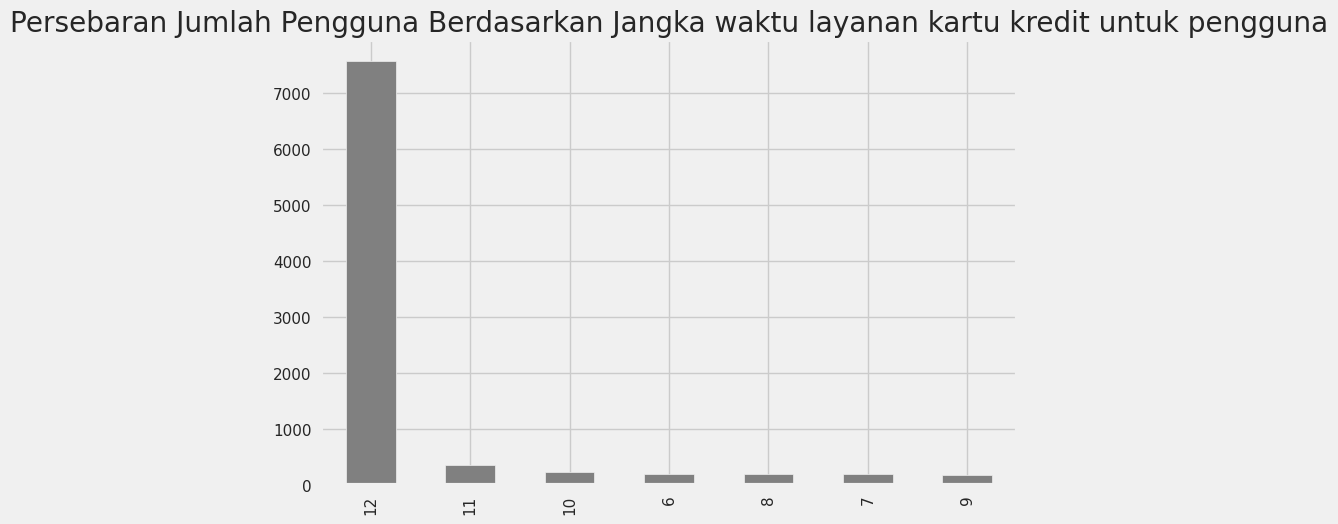

In [130]:
#Melihat persebaran data kolom Jangka waktu layanan kartu kredit untuk pengguna dengan bar plot
df['JangkaWaktu'].value_counts().plot.bar(color='grey')
plt.title('Persebaran Jumlah Pengguna Berdasarkan Jangka waktu layanan kartu kredit untuk pengguna')
plt.show()

Dapat dilihat persebaran data jumlah pengguna dengan Jangka waktu layanan kartu kredit untuk pengguna 12 bulan sangat banyak dengan jumlah diatas 7000, sedangkan jumlah pengguna dengan Jangka waktu layanan kartu kredit untuk pengguna 9 - 11 bulan rata-rata berada diangka kurang dari 1000


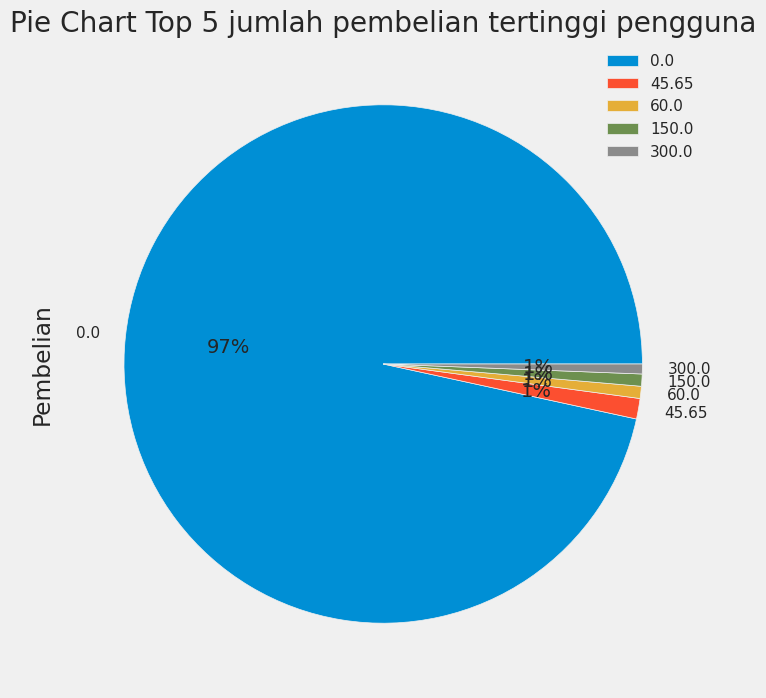

In [131]:
#Visualisasi top 5 jumlah pembelian tertinggi
df_v = pd.DataFrame(df['Pembelian'].value_counts())
plot = df_v.head().plot.pie(y='Pembelian', figsize=(8, 8), autopct='%1.0f%%');

plt.title("Pie Chart Top 5 jumlah pembelian tertinggi pengguna")
plt.show()

dapat dilihat bahwa 5 jumlah pembelian tertinggi pengguna diantaranya 0.0, 45.65, 150.0, 60.0, dan 200.0



Text(0.5, 1.0, 'JangkaWaktu vs Batas Kredit')

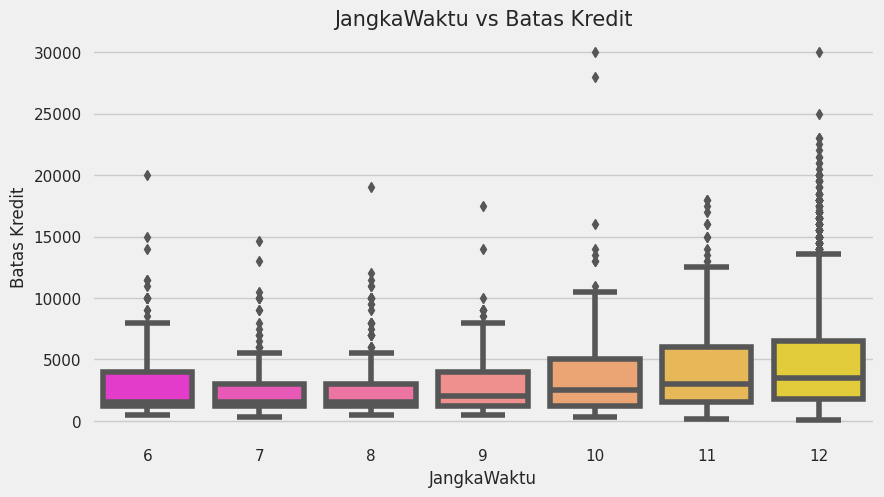

In [132]:
# Visualisasi boxplot perbandingan Jangka waktu layanan kartu kredit untuk pengguna dan Batas Kredit
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='JangkaWaktu', y='BatasKredit', data=df, palette="spring")

plt.xlabel("JangkaWaktu", fontsize= 12)
plt.ylabel("Batas Kredit", fontsize= 12)
plt.title("JangkaWaktu vs Batas Kredit", fontsize= 15)

Dapat dilihat pada semua Jangka waktu layanan kartu kredit untuk pengguna memiliki outliers.


Text(0.5, 1.0, 'JangkaWaktu vs Frekuensi saldo')

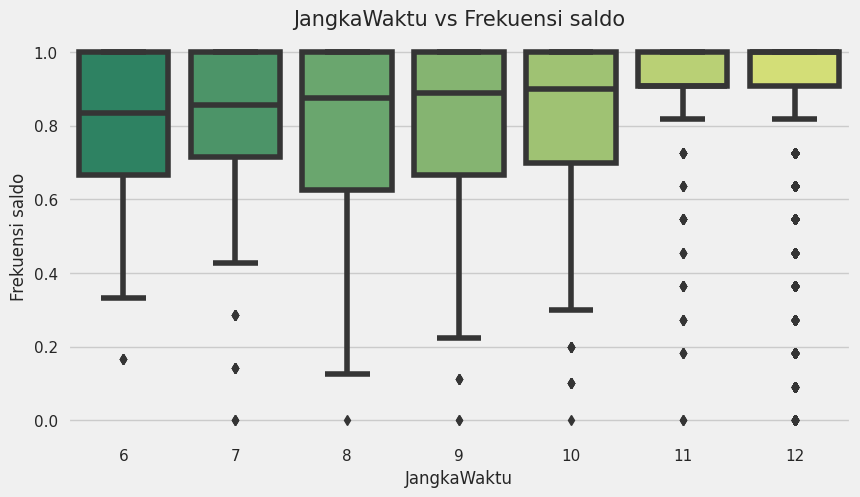

In [133]:
#Visualisasi boxplot perbandingan Jangka waktu layanan kartu kredit dan Frekuensi saldo
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='JangkaWaktu', y='FrekuensiSaldo', data=df, palette="summer")

plt.xlabel("JangkaWaktu", fontsize= 12)
plt.ylabel("Frekuensi saldo", fontsize= 12)
plt.title("JangkaWaktu vs Frekuensi saldo", fontsize= 15)

Text(0.5, 1.0, 'Saldo vs Pembelian')

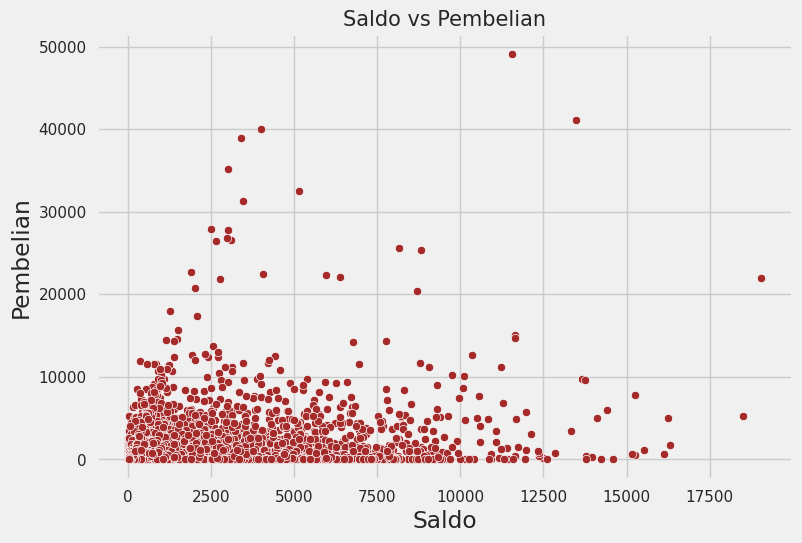

In [134]:
#Visualisasi scatterplot antara saldo dan pembelian
sns.scatterplot(x='Saldo', y='Pembelian', data=df, color='brown')
plt.title("Saldo vs Pembelian", fontsize= 15)

Dari plot dapat dilihat bahwa rata-rata pengguna kartu kredit memiliki saldo diantara 0 - 12500 dengan banyak pembelian rata-rata antara 0 - 10000. terlihat ada satu pengguna dengan pembelian yang tinggi hapir 50000  dengan saldo sekitar 12000.

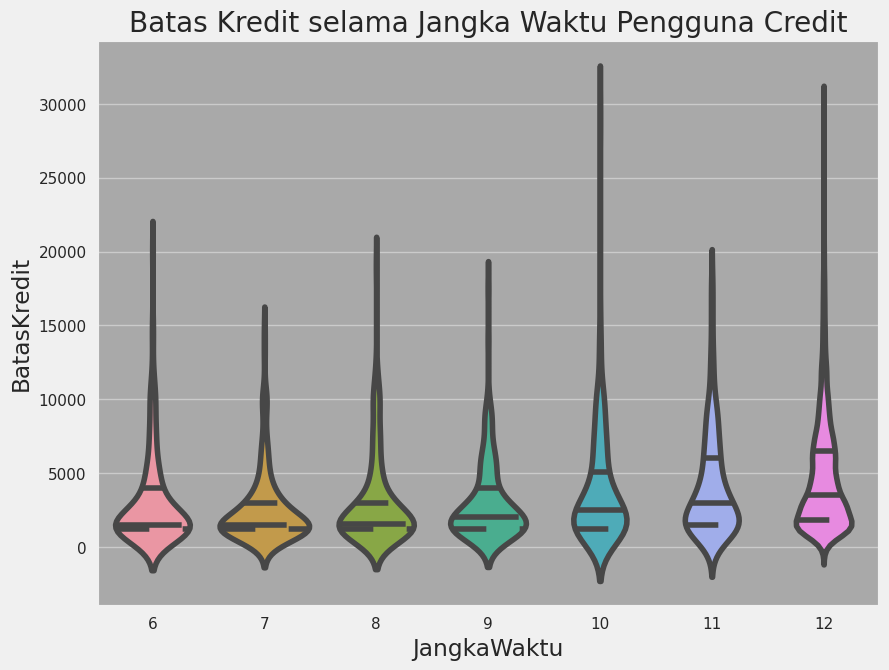

In [136]:
#Visualisasi violinplot antara kolom JangkaWaktu dan kolom BatasKredit
plt.figure(figsize=(9,7))
ax = plt.axes()
ax.set_facecolor('darkgrey')
sns.violinplot(x='JangkaWaktu', y='BatasKredit', data=df, inner='quartile')
plt.xlabel('JangkaWaktu')
plt.ylabel('BatasKredit')
plt.title('Batas Kredit selama Jangka Waktu Pengguna Credit')
plt.show()

array([[<Axes: title={'center': 'Saldo'}>,
        <Axes: title={'center': 'FrekuensiSaldo'}>,
        <Axes: title={'center': 'Pembelian'}>,
        <Axes: title={'center': 'PembelianOneoff'}>],
       [<Axes: title={'center': 'PembelianAngsuran'}>,
        <Axes: title={'center': 'PenarikanTunai'}>,
        <Axes: title={'center': 'FrekuensiPembelian'}>,
        <Axes: title={'center': 'FrekuensiPembelianOneoff'}>],
       [<Axes: title={'center': 'FrekuensiPembelianAngsuran'}>,
        <Axes: title={'center': 'FrekuensiPenarikanTunai'}>,
        <Axes: title={'center': 'PenarikanTunaiTRX'}>,
        <Axes: title={'center': 'PembelianTRX'}>],
       [<Axes: title={'center': 'BatasKredit'}>,
        <Axes: title={'center': 'Pembayaran'}>,
        <Axes: title={'center': 'MinimalPembayaran'}>,
        <Axes: title={'center': 'PembayaranFullPRC'}>],
       [<Axes: title={'center': 'JangkaWaktu'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

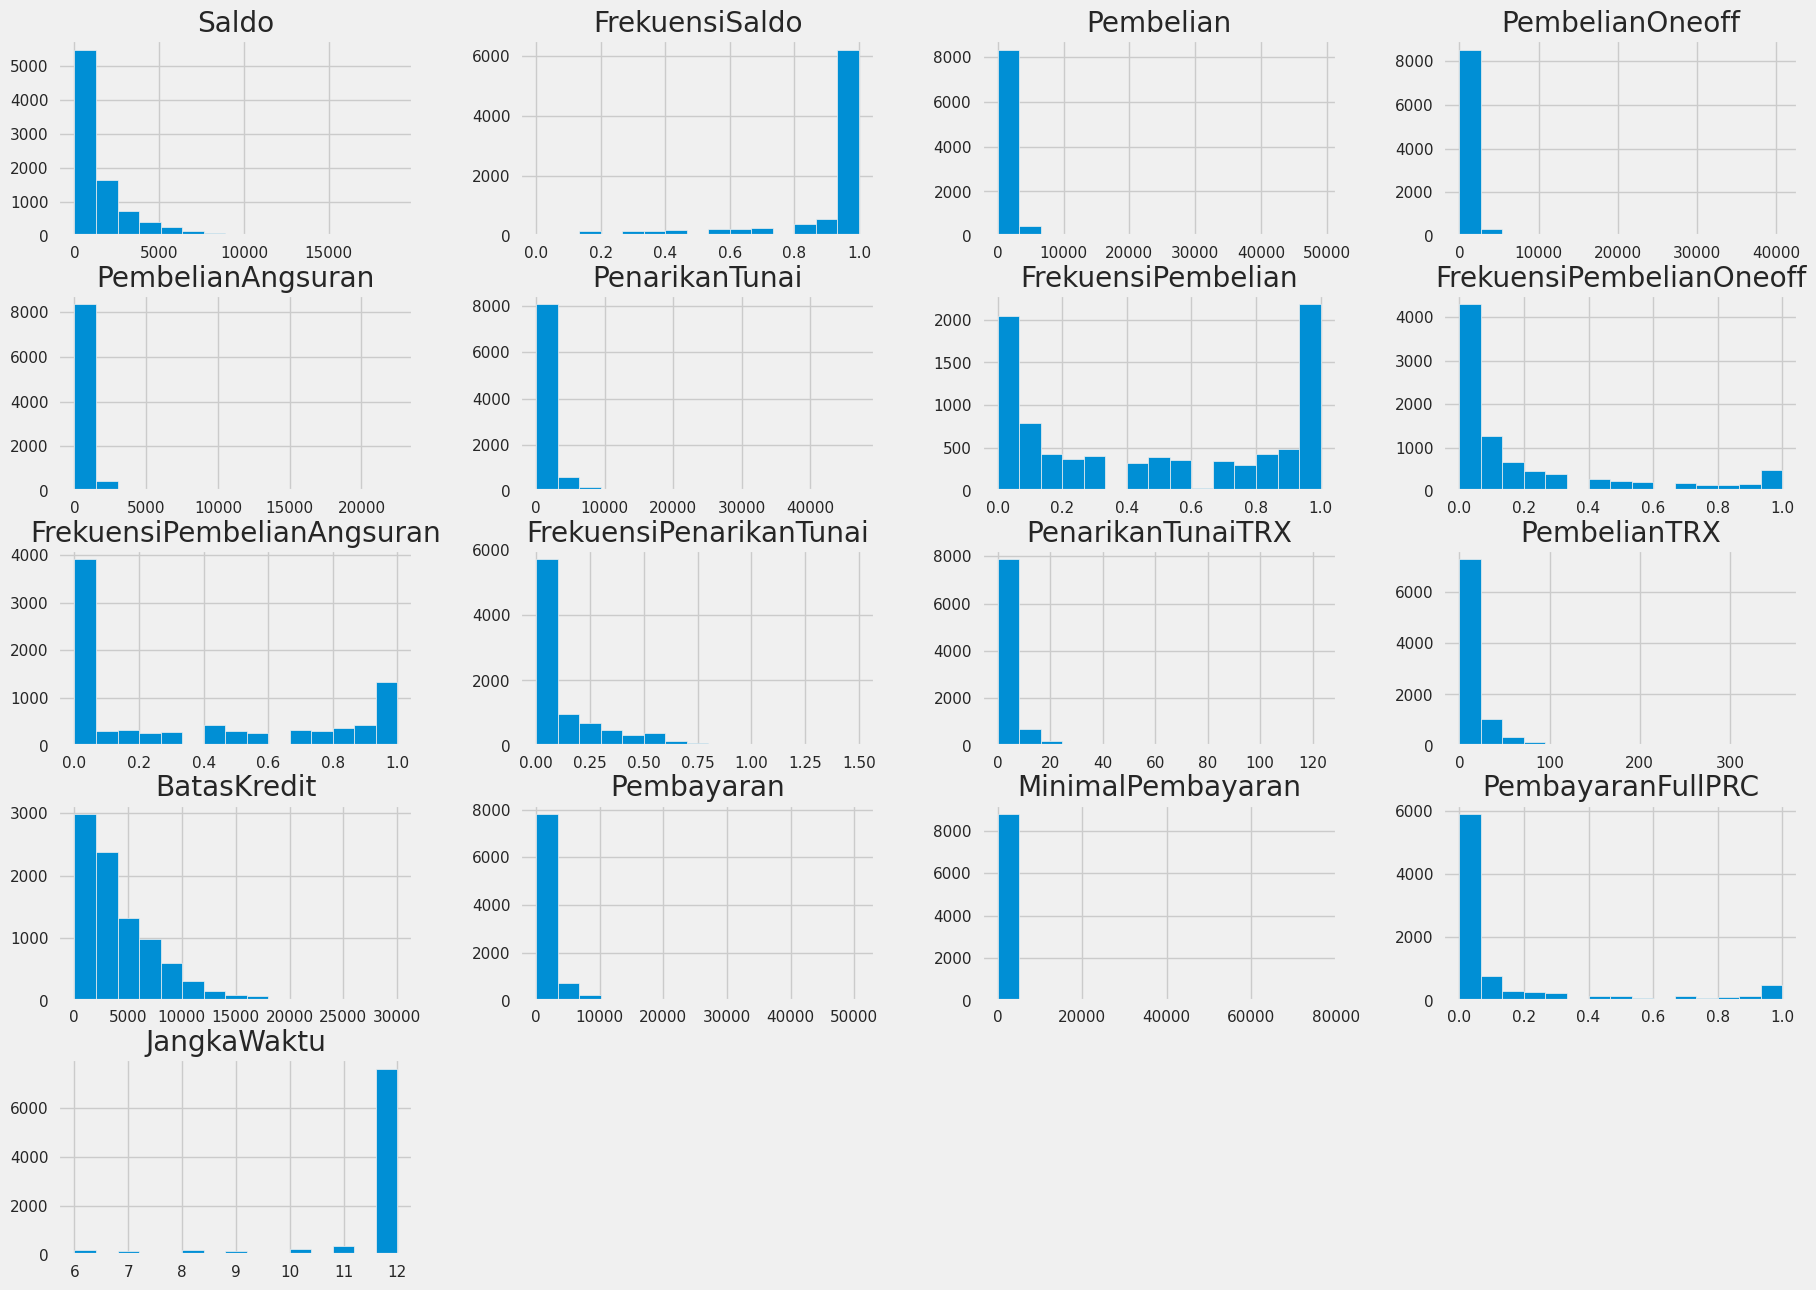

In [137]:
# Visualisasi histogram masing-masing kolom data
num_col = df.columns
df[num_col].hist(bins=15, figsize=(20, 15), layout=(5, 4))

In [138]:
#Melihat korelasi antar variabel
df.corr()

Saldo   FrekuensiSaldo  Pembelian  \
Saldo                       1.000000     0.322335     0.181230    
FrekuensiSaldo              0.322335     1.000000     0.133586    
Pembelian                   0.181230     0.133586     1.000000    
PembelianOneoff             0.164326     0.104257     0.916844    
PembelianAngsuran           0.126437     0.124204     0.679889    
PenarikanTunai              0.496679     0.099312    -0.051495    
FrekuensiPembelian         -0.078054     0.229440     0.392991    
FrekuensiPembelianOneoff    0.073114     0.202295     0.498413    
FrekuensiPembelianAngsuran -0.063267     0.175869     0.315537    
FrekuensiPenarikanTunai     0.449246     0.192022    -0.120137    
PenarikanTunaiTRX           0.385139     0.141516    -0.067194    
PembelianTRX                0.154297     0.189527     0.689552    
BatasKredit                 0.531283     0.095843     0.356963    
Pembayaran                  0.322769     0.064842     0.603252    
MinimalPembayaran           0.397906     0.131128     0.095772    
PembayaranFullPRC          -0.319018    -0.095308     0.180356    
JangkaWaktu                 0.072421     0.118566     0.086155    

                            PembelianOneoff  PembelianAngsuran  \
Saldo                          0.164326          0.126437        
FrekuensiSaldo                 0.104257          0.124204        
Pembelian                      0.916844          0.679889        
PembelianOneoff                1.000000          0.330610        
PembelianAngsuran              0.330610          1.000000        
PenarikanTunai                -0.031341         -0.064264        
FrekuensiPembelian             0.264913          0.442398        
FrekuensiPembelianOneoff       0.524881          0.214016        
FrekuensiPembelianAngsuran     0.127699          0.511334        
FrekuensiPenarikanTunai       -0.082622         -0.132312        
PenarikanTunaiTRX             -0.046226         -0.074017        
PembelianTRX                   0.545514          0.628097        
BatasKredit                    0.319724          0.256499        
Pembayaran                     0.567283          0.384066        
MinimalPembayaran              0.050243          0.134003        
PembayaranFullPRC              0.132745          0.182548        
JangkaWaktu                    0.064047          0.086016        

                            PenarikanTunai  FrekuensiPembelian  \
Saldo                          0.496679         -0.078054        
FrekuensiSaldo                 0.099312          0.229440        
Pembelian                     -0.051495          0.392991        
PembelianOneoff               -0.031341          0.264913        
PembelianAngsuran             -0.064264          0.442398        
PenarikanTunai                 1.000000         -0.215579        
FrekuensiPembelian            -0.215579          1.000000        
FrekuensiPembelianOneoff      -0.086786          0.501305        
FrekuensiPembelianAngsuran    -0.177118          0.862921        
FrekuensiPenarikanTunai        0.628535         -0.308483        
PenarikanTunaiTRX              0.656493         -0.203541        
PembelianTRX                  -0.075877          0.568408        
BatasKredit                    0.303985          0.119788        
Pembayaran                     0.453226          0.103393        
MinimalPembayaran              0.140735          0.006106        
PembayaranFullPRC             -0.152961          0.305761        
JangkaWaktu                   -0.068552          0.061006        

                            FrekuensiPembelianOneoff  \
Saldo                               0.073114           
FrekuensiSaldo                      0.202295           
Pembelian                           0.498413           
PembelianOneoff                     0.524881           
PembelianAngsuran                   0.214016           
PenarikanTunai                     -0.086786           
FrekuensiPembelian                  0.501305         

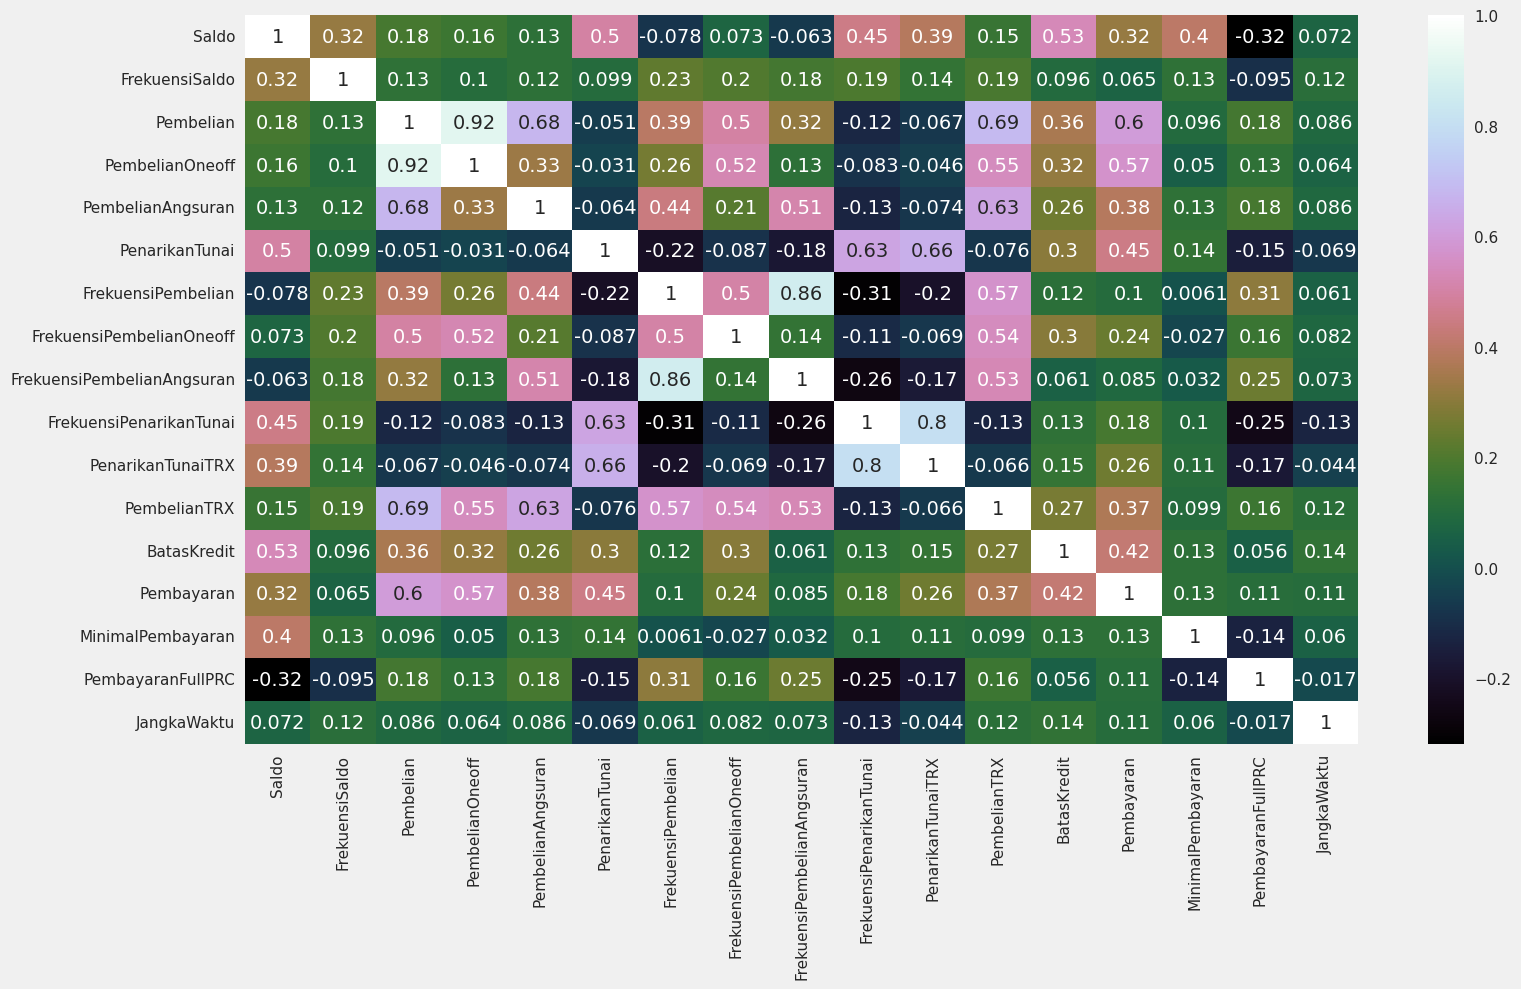

In [139]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix')
plt.show()

Dalam heatmap tersebut, terlihat bahwa terdapat beberapa variabel yang memiliki kolerasi yang cukup tinggi diantaranya :
- Pembelian dengan PembelianOneoff dengan korelasi 0.92
- FrekuensiPembelian dengan FrekuensiPembelianAngsuran dengan korelasi 0.86
- FrekuensiPenarikanTunai dengan PenarikanTunaiTRX dengan korelasi 0.8

Kemudiian terdapat juga beberapa variabel yang memiliki kolerasi yang cukup rendah diantaranya :
- Saldo dengan PembayaranFullPRC dengan korelasi -0.32
- FrekuensiPembelian dengan FrekuensiPenarikanTunai dengan korelasi -0.31
- FrekuensiPembelianAngsuran dengan FrekuensiPenarikanTunsi dengan korelasi -0.26

## **5. Data Preprocessing**

In [140]:
df.describe()

Saldo     FrekuensiSaldo    Pembelian   PembelianOneoff  \
count   8949.000000    8949.000000    8949.000000    8949.000000     
mean    1564.647593       0.877350    1003.316936     592.503572     
std     2081.584016       0.236798    2136.727848    1659.968851     
min        0.000000       0.000000       0.000000       0.000000     
25%      128.365782       0.888889      39.800000       0.000000     
50%      873.680279       1.000000     361.490000      38.000000     
75%     2054.372848       1.000000    1110.170000     577.830000     
max    19043.138560       1.000000   49039.570000   40761.250000     

       PembelianAngsuran  PenarikanTunai  FrekuensiPembelian  \
count     8949.000000       8949.000000       8949.000000      
mean       411.113579        978.959616          0.490405      
std        904.378205       2097.264344          0.401360      
min          0.000000          0.000000          0.000000      
25%          0.000000          0.000000          0.083333      
50%         89.000000          0.000000          0.500000      
75%        468.650000       1113.868654          0.916667      
max      22500.000000      47137.211760          1.000000      

       FrekuensiPembelianOneoff  FrekuensiPembelianAngsuran  \
count         8949.000000                8949.000000          
mean             0.202480                   0.364478          
std              0.298345                   0.397451          
min              0.000000                   0.000000          
25%              0.000000                   0.000000          
50%              0.083333                   0.166667          
75%              0.300000                   0.750000          
max              1.000000                   1.000000          

       FrekuensiPenarikanTunai  PenarikanTunaiTRX  PembelianTRX   BatasKredit  \
count        8949.000000           8949.000000      8949.000000   8949.000000   
mean            0.135141              3.249078        14.711476   4494.449450   
std             0.200132              6.824987        24.858552   3638.815725   
min             0.000000              0.000000         0.000000     50.000000   
25%             0.000000              0.000000         1.000000   1600.000000   
50%             0.000000              0.000000         7.000000   3000.000000   
75%             0.222222              4.000000        17.000000   6500.000000   
max             1.500000            123.000000       358.000000  30000.000000   

        Pembayaran   MinimalPembayaran  PembayaranFullPRC  JangkaWaktu  
count   8949.000000     8949.000000        8949.000000     8949.000000  
mean    1733.336511      844.999569           0.153732       11.517935  
std     2895.168146     2332.906149           0.292511        1.337134  
min        0.000000        0.019163           0.000000        6.000000  
25%      383.282850      170.875613           0.000000       12.000000  
50%      857.062706      312.343947           0.000000       12.000000  
75%     1901.279320      788.721609           0.142857       12.000000  
max    50721.483360    76406.207520           1.000000       12.000000

In [141]:
# Standardize data
scaler = StandardScaler()
df_train = scaler.fit_transform(df.values)
df_train.shape

(8949, 17)

In [142]:
# Statistics of scaled data
df_train = pd.DataFrame(df_train, columns=df.columns)
df_train.head()

Saldo   FrekuensiSaldo  Pembelian  PembelianOneoff  PembelianAngsuran  \
0 -0.732054    -0.249881    -0.424934     -0.356957         -0.349114        
1  0.786858     0.134049    -0.469584     -0.356957         -0.454607        
2  0.447041     0.517980    -0.107716      0.108843         -0.454607        
3  0.049015    -1.017743     0.231995      0.546123         -0.454607        
4 -0.358849     0.517980    -0.462095     -0.347317         -0.454607        

   PenarikanTunai  FrekuensiPembelian  FrekuensiPembelianOneoff  \
0    -0.466805         -0.806649              -0.678716           
1     2.605438         -1.221928              -0.678716           
2    -0.466805          1.269742               2.673295           
3    -0.368678         -1.014290              -0.399383           
4    -0.466805         -1.014290              -0.399383           

   FrekuensiPembelianAngsuran  FrekuensiPenarikanTunai  PenarikanTunaiTRX  \
0          -0.707409                 -0.675294             -0.476083        
1          -0.917090                  0.573949              0.110032        
2          -0.917090                 -0.675294             -0.476083        
3          -0.917090                 -0.258882             -0.329554        
4          -0.917090                 -0.675294             -0.476083        

   PembelianTRX  BatasKredit  Pembayaran  MinimalPembayaran  \
0   -0.511381    -0.960380    -0.529026      -0.302425        
1   -0.591841     0.688601     0.818546       0.097455        
2   -0.109082     0.826016    -0.383857      -0.093329        
3   -0.551611     0.826016    -0.598733      -0.228336        
4   -0.551611    -0.905414    -0.364421      -0.257294        

   PembayaranFullPRC  JangkaWaktu  
0     -0.525588        0.360541    
1      0.234159        0.360541    
2     -0.525588        0.360541    
3     -0.525588        0.360541    
4     -0.525588        0.360541

In [143]:
# melihat hasil Hiesrarchical
hier_cluster = linkage(df_train, method='ward')

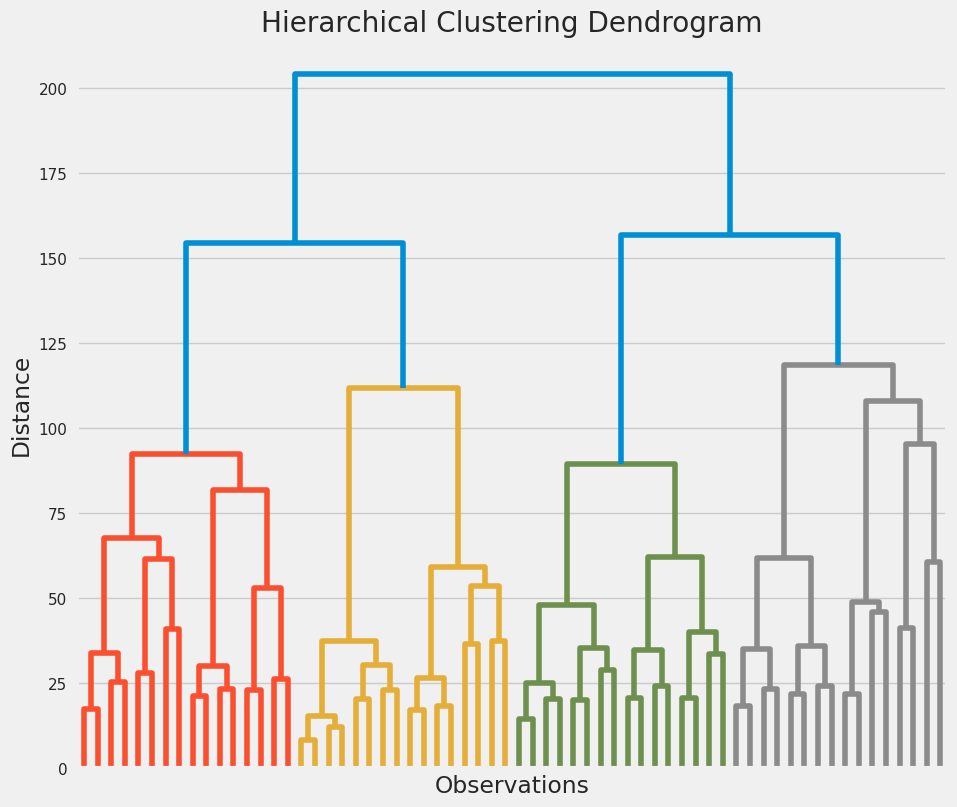

In [144]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

Pada hasil Hierarchical Clustering Dendrogram didapatkan ada sekitar 4 clade dimana Di atas ketinggian 125, jika menggambar garis horizontal, akan didapatkan 4 kelompok umum (cluster) pada data.


In [145]:
# kmeans Clustering
Kmean = KMeans(n_clusters=2)
Kmean

KMeans(n_clusters=2)

dalam metode K-Means Clustering, kami akan mengirimkan jumlah komponen sebanyak 2 (n_comonents=2). Disini beberapa komponen mewakili dimensi yang lebih rendah dan kami akan memproyeksikan data dimensi yang lebih tinggi.

In [146]:
# PCA untuk dua Komponen Utama
pca = PCA()
pca

PCA()

dalam metode PCA, kami akan menggunakan jumlah komponen mengikuti default dan akan mengikuti nilai dari variance. Disini beberapa komponen mewakili dimensi yang lebih rendah dimana kami akan memproyeksikan data dimensi yang lebih tinggi.

## **6. Model Trainee**

In [147]:
kmeansCluster = Kmean.fit(df_train)
kmeansCluster

KMeans(n_clusters=2)

In [148]:
# PCA
principalComponents = pca.fit_transform(df_train)
principalComponents

array([[-1.68376806e+00, -1.07256915e+00,  4.77241133e-01, ...,
         1.49982475e-01,  4.82631021e-02, -1.60525439e-04],
       [-1.13484551e+00,  2.50873857e+00,  6.03529282e-01, ...,
        -5.32871471e-01, -8.28647113e-02,  3.10427945e-06],
       [ 9.69060312e-01, -3.83487466e-01,  9.26460189e-02, ...,
         2.21695810e-01,  5.11339980e-01,  2.23675234e-05],
       ...,
       [-9.28482061e-01, -1.80772339e+00, -4.64892972e-01, ...,
         4.60456994e-01,  1.57561382e-01, -1.63262830e-04],
       [-2.33744226e+00, -6.53443852e-01,  9.76835112e-01, ...,
         2.63555321e-01, -1.89851745e-01, -8.61159319e-05],
       [-5.57578037e-01, -4.00281042e-01,  1.02684978e+00, ...,
        -4.18999687e-01,  3.57119510e-01, -7.45709576e-05]])

## **7.  Evaluasi Model**

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

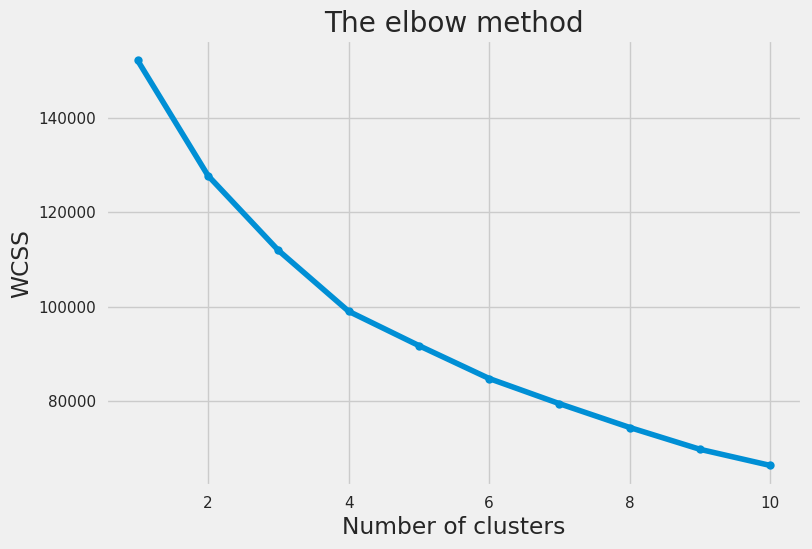

In [149]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

berdasarkan output, terlihat bahawa plot data membentuk siku pada k=4

Melatih model KMeans dengan n_clusters sebanyak 4

In [150]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(df_train)

KMeans(n_clusters=4, random_state=3)

In [151]:
#menambahkan Kmeans pada data frame
data_kmeans = df.copy()
data_kmeans['KMeans Segment'] = kmeans.labels_

In [152]:
# Melihat transformasi data KMeans dengan melakukan groupby berdasarkan rata-rata KMeans segment
data_transf_kmeans = data_kmeans.groupby('KMeans Segment').mean()
data_transf_kmeans

Saldo     FrekuensiSaldo   Pembelian   PembelianOneoff  \
KMeans Segment                                                              
0               1012.995969     0.790134      270.281184     210.068828     
1               3551.153761     0.986879     7681.620098    5095.878826     
2               4602.449658     0.968389      501.862982     320.188797     
3                894.768927     0.934715     1236.263333     593.995933     

                PembelianAngsuran  PenarikanTunai  FrekuensiPembelian  \
KMeans Segment                                                          
0                    60.479311        597.154288        0.170292        
1                  2587.208264        653.638891        0.946418        
2                   181.759123       4521.509581        0.287832        
3                   642.541696        209.816318        0.885255        

                FrekuensiPembelianOneoff  FrekuensiPembelianAngsuran  \
KMeans Segment                                                         
0                       0.086343                   0.080662            
1                       0.739031                   0.788060            
2                       0.138911                   0.185671            
3                       0.297109                   0.711930            

                FrekuensiPenarikanTunai  PenarikanTunaiTRX  PembelianTRX  \
KMeans Segment                                                             
0                      0.114888               2.126226         2.907971    
1                      0.071290               2.085575        89.359413    
2                      0.484792              14.294904         7.665831    
3                      0.042487               0.789067        22.092692    

                BatasKredit  Pembayaran   MinimalPembayaran  \
KMeans Segment                                                
0               3278.263348   975.328059      554.004182      
1               9696.943765  7288.739497     1972.767288      
2               7546.160857  3484.054216     2003.674460      
3               4214.013741  1331.325429      639.740452      

                PembayaranFullPRC  JangkaWaktu  
KMeans Segment                                  
0                   0.078002        11.448076   
1                   0.286707        11.951100   
2                   0.034888        11.386800   
3                   0.269313        11.594474

Dari hasil grouping segment KMeans, selanjutnya kami mencoba membuat kesimpulan tentang segment tersebut dan memberi nama pada segment tersebut.

Disini Penarikan Tunai berkaitan dengan penggunaan kartu kredit dengan penarikan tunai yang biasanya dikenakan biaya dan memiliki tingkat bunga.

- Melakukan pemberian nama pada segment

In [153]:
data_transf_kmeans.rename({0:'Pengguna Level Tengah (Middle Ground)',
                           1:'Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)',
                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)',
                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

Saldo     \
KMeans Segment                                                                          
Pengguna Level Tengah (Middle Ground)                                     1012.995969   
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)  3551.153761   
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)          4602.449658   
Pengguna Kredit Hemat (Frugal Credit Users)                                894.768927   

                                                                          FrekuensiSaldo  \
KMeans Segment                                                                             
Pengguna Level Tengah (Middle Ground)                                        0.790134      
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)     0.986879      
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)             0.968389      
Pengguna Kredit Hemat (Frugal Credit Users)                                  0.934715      

                                                                           Pembelian   \
KMeans Segment                                                                          
Pengguna Level Tengah (Middle Ground)                                      270.281184   
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)  7681.620098   
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)           501.862982   
Pengguna Kredit Hemat (Frugal Credit Users)                               1236.263333   

                                                                          PembelianOneoff  \
KMeans Segment                                                                              
Pengguna Level Tengah (Middle Ground)                                        210.068828     
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)    5095.878826     
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)             320.188797     
Pengguna Kredit Hemat (Frugal Credit Users)                                  593.995933     

                                                                          PembelianAngsuran  \
KMeans Segment                                                                                
Pengguna Level Tengah (Middle Ground)                                          60.479311      
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)     2587.208264      
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)              181.759123      
Pengguna Kredit Hemat (Frugal Credit Users)                                   642.541696      

                                                                          PenarikanTunai  \
KMeans Segment                                                                             
Pengguna Level Tengah (Middle Ground)                                        597.154288    
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)     653.638891    
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)            4521.509581    
Pengguna Kredit Hemat (Frugal Credit Users)                                  209.816318    

                                                                          FrekuensiPembelian  \
KMeans Segment                                                                                 
Pengguna Level Tengah (Middle Ground)                                          0.170292        
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)       0.946418        
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)               0.287832        
Pengguna Kredit Hemat (Frugal Credit Users)                                    0.885255        

                                                                          FrekuensiPembelianOneoff  \
KMeans Segment                                                                              

In [154]:
# Memasukkan Label KMeans Segment ke dalam dataframe dengan membuat kolom baru
data_kmeans['Labels'] = data_kmeans['KMeans Segment'].map({0:'Pengguna Level Tengah (Middle Ground)',
                                                           1:'Pengguna dengan Kredit Pembelian Tinggi (High Credit Frequent Purchasers)',
                                                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)',
                                                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

data_kmeans.head()

Saldo     FrekuensiSaldo  Pembelian  PembelianOneoff  PembelianAngsuran  \
0    40.900749     0.818182        95.40          0.00            95.4          
1  3202.467416     0.909091         0.00          0.00             0.0          
2  2495.148862     1.000000       773.17        773.17             0.0          
3  1666.670542     0.636364      1499.00       1499.00             0.0          
4   817.714335     1.000000        16.00         16.00             0.0          

   PenarikanTunai  FrekuensiPembelian  FrekuensiPembelianOneoff  \
0       0.000000        0.166667               0.000000           
1    6442.945483        0.000000               0.000000           
2       0.000000        1.000000               1.000000           
3     205.788017        0.083333               0.083333           
4       0.000000        0.083333               0.083333           

   FrekuensiPembelianAngsuran  FrekuensiPenarikanTunai  PenarikanTunaiTRX  \
0           0.083333                  0.000000                  0           
1           0.000000                  0.250000                  4           
2           0.000000                  0.000000                  0           
3           0.000000                  0.083333                  1           
4           0.000000                  0.000000                  0           

   PembelianTRX  BatasKredit  Pembayaran   MinimalPembayaran  \
0        2         1000.0      201.802084      139.509787      
1        0         7000.0     4103.032597     1072.340217      
2       12         7500.0      622.066742      627.284787      
3        1         7500.0        0.000000      312.343947      
4        1         1200.0      678.334763      244.791237      

   PembayaranFullPRC  JangkaWaktu  KMeans Segment  \
0      0.000000           12              0         
1      0.222222           12              2         
2      0.000000           12              3         
3      0.000000           12              0         
4      0.000000           12              0         

                                Labels                               
0                             Pengguna Level Tengah (Middle Ground)  
1  Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)  
2                       Pengguna Kredit Hemat (Frugal Credit Users)  
3                             Pengguna Level Tengah (Middle Ground)  
4                             Pengguna Level Tengah (Middle Ground)

**Analisis Segment K-Means**

Disini dilakukan plotting atribut pada segment KMeans yang membagi data serta melihat perbedaan antara segmen pelanggan.

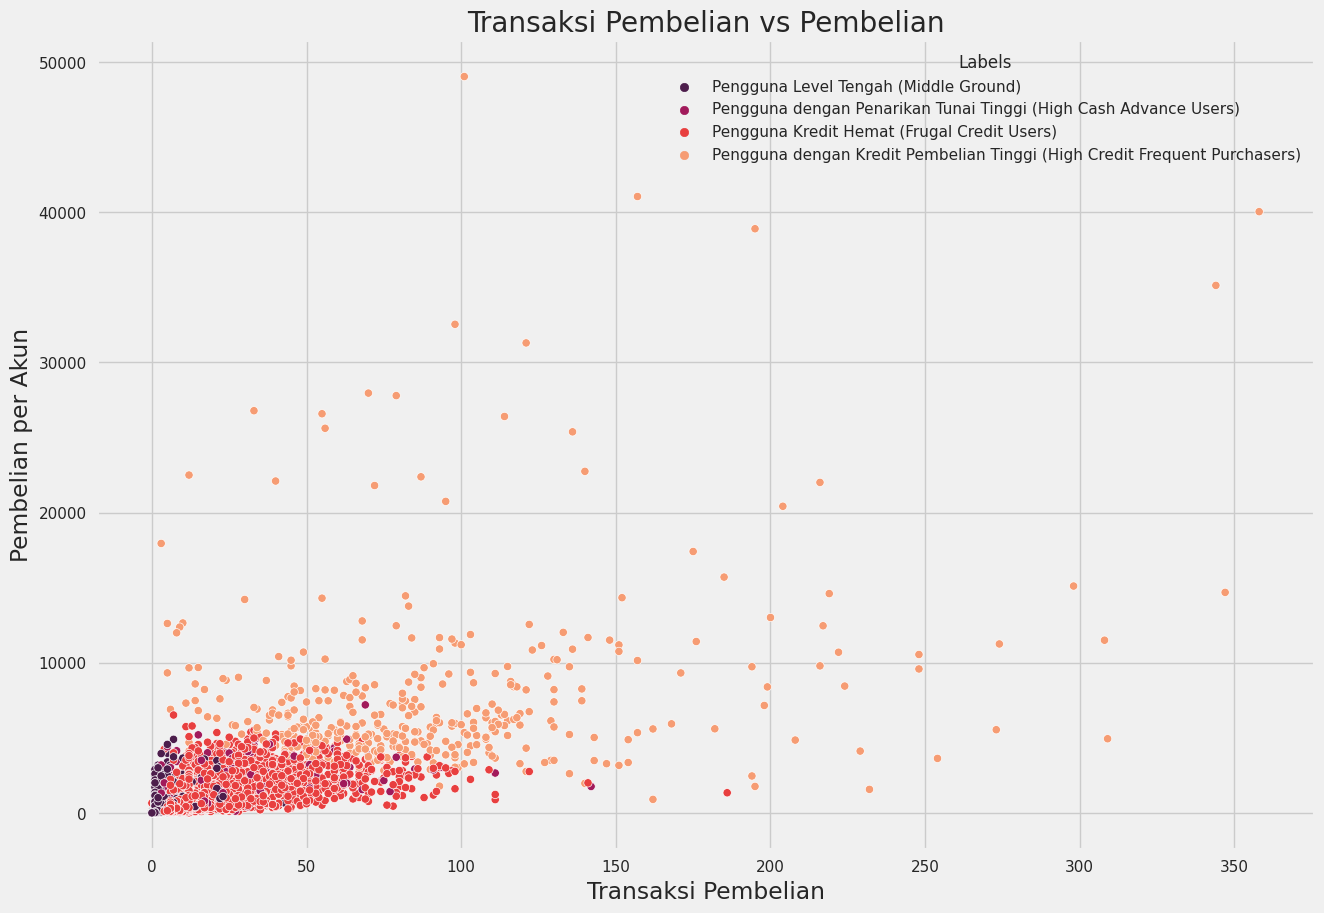

<Figure size 800x550 with 0 Axes>

In [155]:
#dapat mengilustrasikan grup berdasarkan beberapa fitur dalam scatterplot

plt.figure(figsize=(14,10))
X = data_kmeans['PembelianTRX']
Y = data_kmeans['Pembelian']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Transaksi Pembelian')
g.set_ylabel('Pembelian per Akun')
g.set_title('Transaksi Pembelian vs Pembelian')
plt.show()

plt.savefig("Transaksi Pembelian vs Pembelian KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari grafik terlihat dari 4 cluster, cluster Pengguna dengan kredit pembelian tinggi (pink) terdapat transaksi pembelian sampai melebihi 350 dan pembelian per akun melebihi 40000. Sedangkan untuk ketiga cluster lainnya pembelian per akun hanya kurang dari 10000



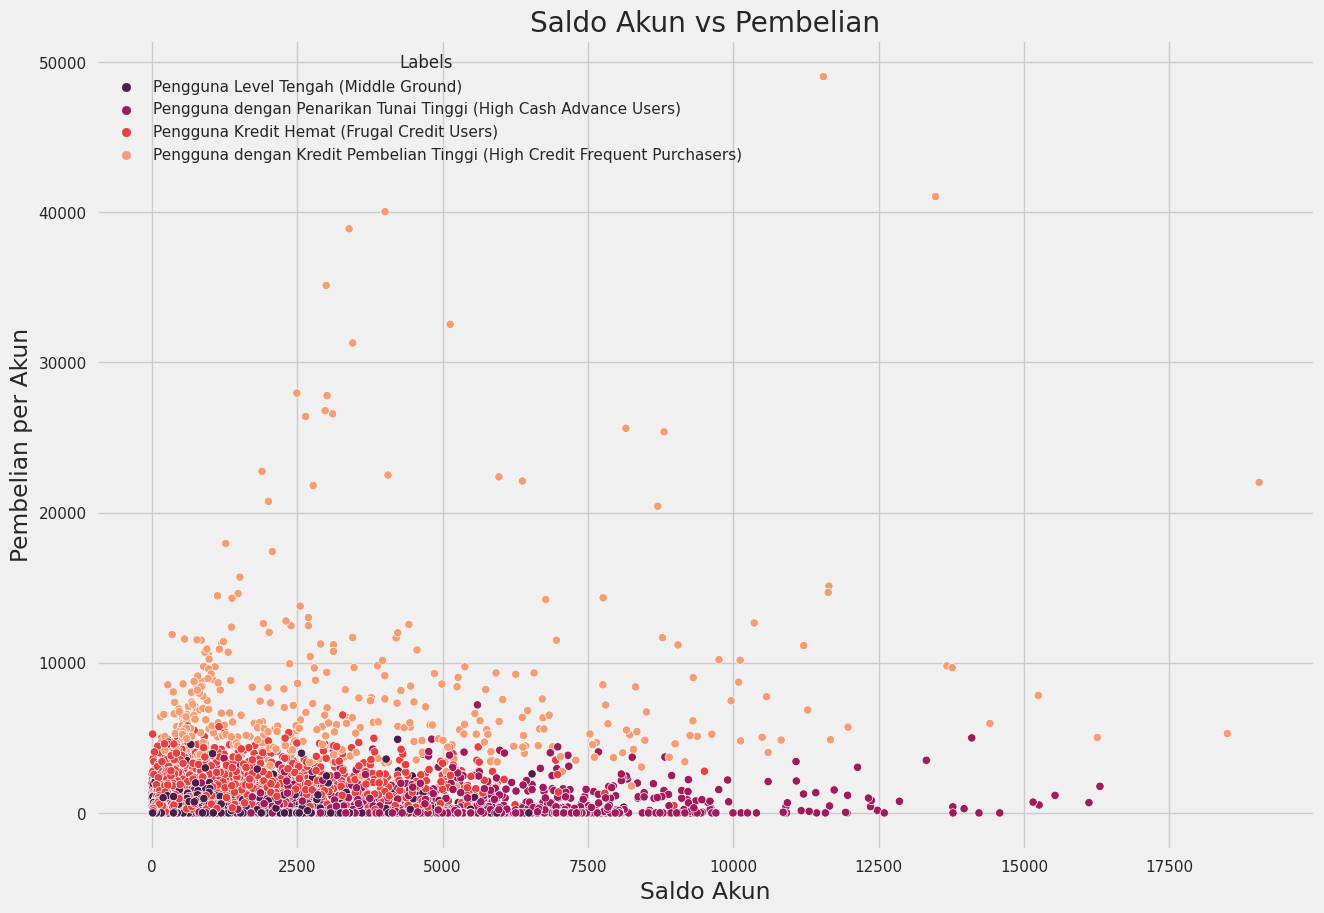

<Figure size 800x550 with 0 Axes>

In [156]:
#Saldo Akun vs Pembelian
plt.figure(figsize=(14,10))
X = data_kmeans['Saldo']
Y = data_kmeans['Pembelian']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Saldo Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Saldo Akun vs Pembelian')
plt.show()

plt.savefig("Saldo Akun vs Pembelian KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari grafik terlihat bahwa cluster Pengguna Level tengah (ungu muda) dan cluster pengguna dengan kredit pembelian tinggi (pink) memiliki saldo yang besar, namun perbedaannya terlihat pada pembelian per akun. cluster Pengguna Level tengah (ungu muda) terlihat tidak banyak melakukan pembelian berbeda dengan luster pengguna dengan kredit pembelian tinggi (pink) yang banyak melakukan pembelian

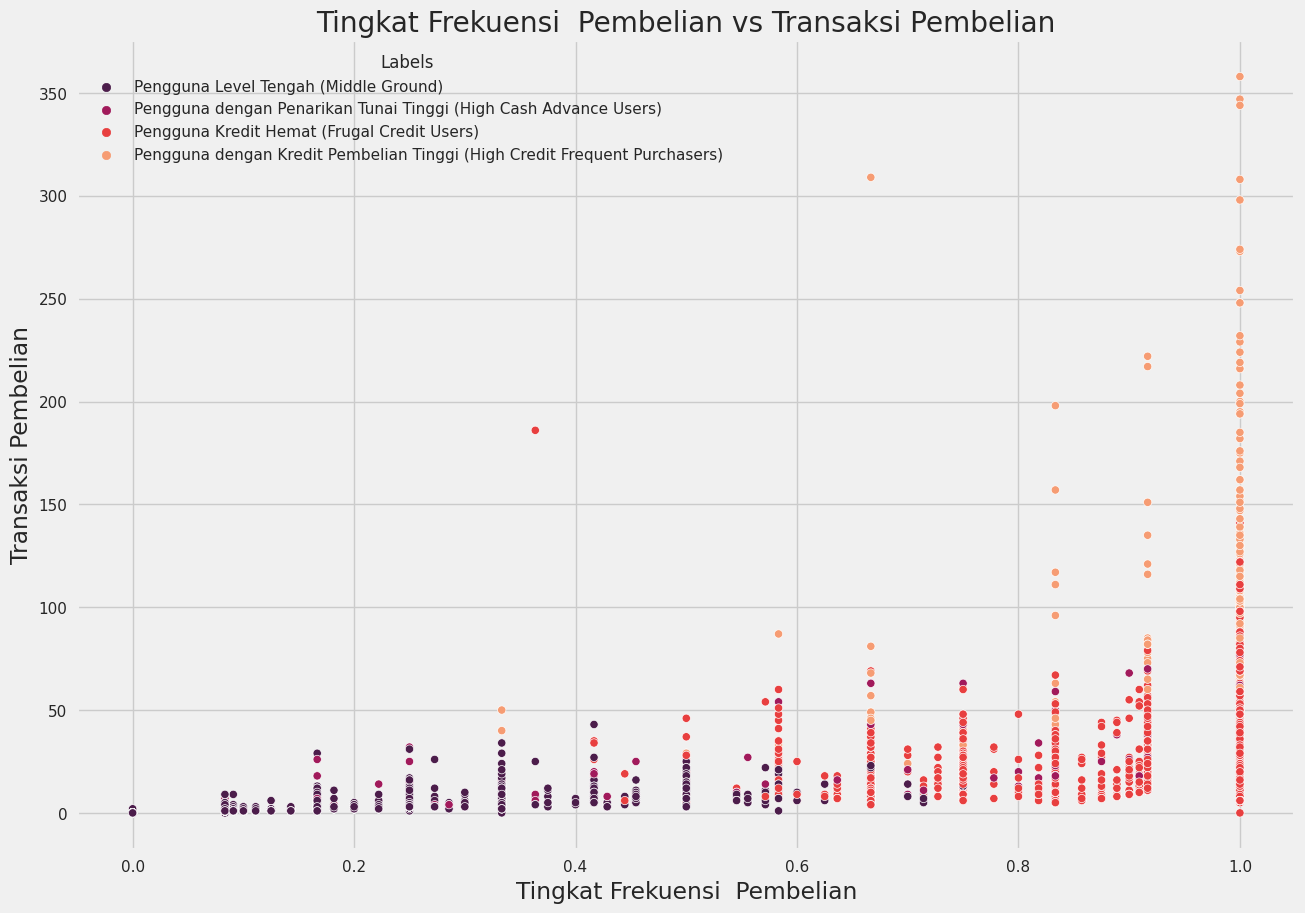

<Figure size 800x550 with 0 Axes>

In [157]:
#Tingkat Frekuensi  Pembelian vs Transaksi Pembelian
plt.figure(figsize=(14,10))
X = data_kmeans['FrekuensiPembelian']
Y = data_kmeans['PembelianTRX']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Tingkat Frekuensi  Pembelian')
g.set_ylabel('Transaksi Pembelian')
g.set_title('Tingkat Frekuensi  Pembelian vs Transaksi Pembelian')
plt.show()

plt.savefig("Tingkat Frekuensi  Pembelian vs Transaksi Pembelian KMeans.png")

Dari grafik terlihat bahwa cluster Pengguna dengan penarikan tunai tinggi (ungu tua) dan cluster Pengguna level tengah (ungu muda) rata-rata memiliki tingkat frekuensi pembelian mulai dari 0.0 sampai kurang lebih 0.7 dengan transaksi pembelian kurang dari 100.

Sedangkan cluster Pengguna kredit hemat (merah) dan cluster Pengguna dengan kredit pembelian tinggi (pink) rata-rata memiliki  tingkat frekuensi pembelian mulai dari 0.3 sampai dengan 1..0 dengan banyaknya transaksi pembelian bisa mencapai lebih dari 100

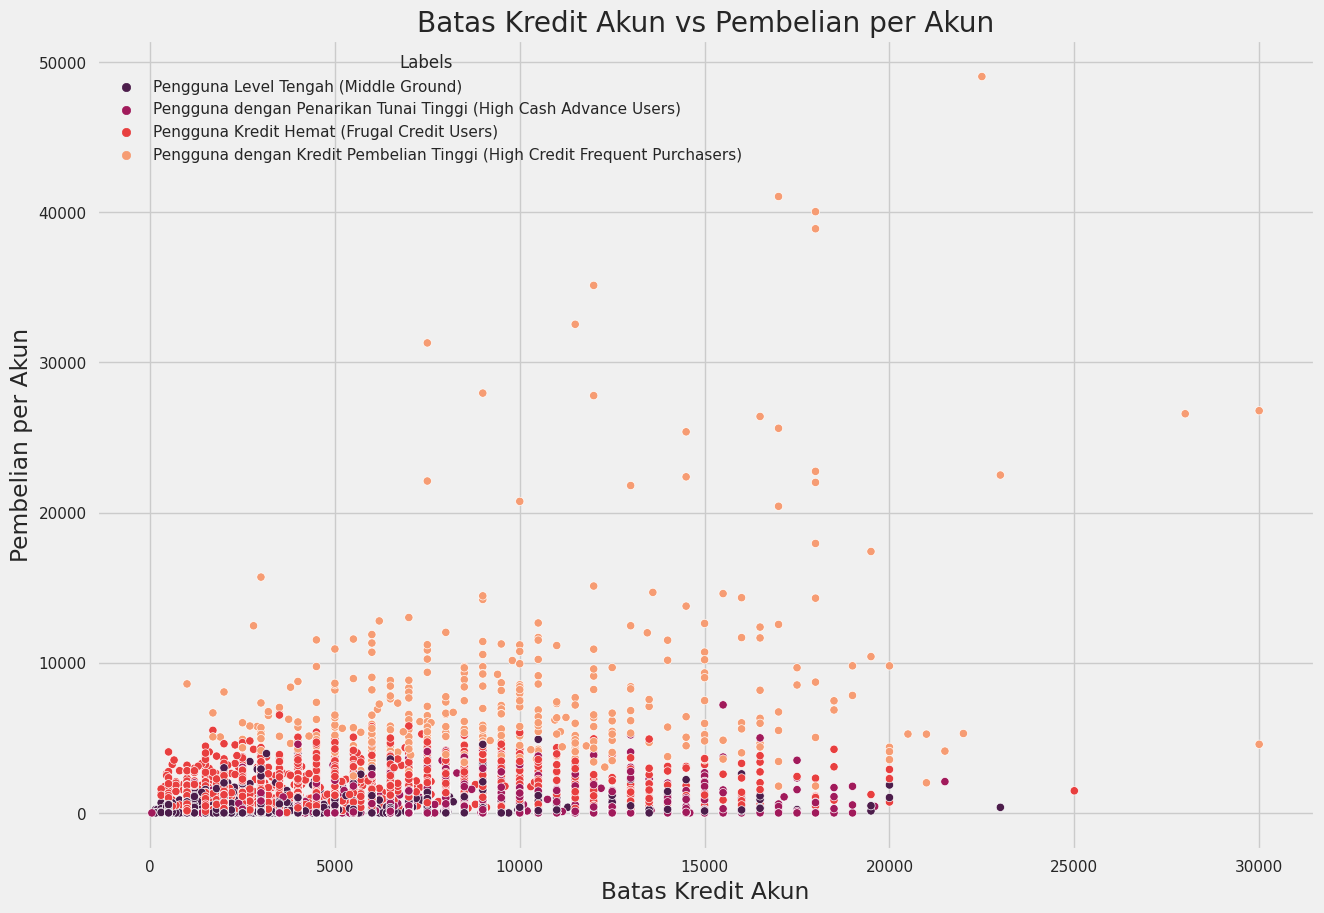

<Figure size 800x550 with 0 Axes>

In [158]:
#Batas Kredit Akun vs Pembelian per Akun
plt.figure(figsize=(14,10))
X = data_kmeans['BatasKredit']
Y = data_kmeans['Pembelian']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Batas Kredit Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Batas Kredit Akun vs Pembelian per Akun')
plt.show()

plt.savefig("Batas Kredit Akun vs Pembelian per Akun KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            orientation ='landscape')

Dari grafik terlihat bahwa rata-rata cluster memiliki batas kredit akun kurang lebih 20000 serta terdapat beberapa yang  lebih. Namun cluster  Pengguna dengan kredit pembelian tinggi (pink) dengan batas kredit tersebut tetap melakukan banyak pembelian melebihi 10000 bahkan terdapat beberapa yang melebihi 30000

In [159]:
# PCA Ratio
pca.explained_variance_ratio_

array([2.72951331e-01, 2.03143936e-01, 8.81230235e-02, 7.48047159e-02,
       6.22536932e-02, 5.73945620e-02, 4.88380094e-02, 4.29857745e-02,
       3.79988506e-02, 3.08007656e-02, 2.37238129e-02, 1.77346091e-02,
       1.42796504e-02, 1.21690287e-02, 1.01269862e-02, 2.67056640e-03,
       6.85241052e-07])

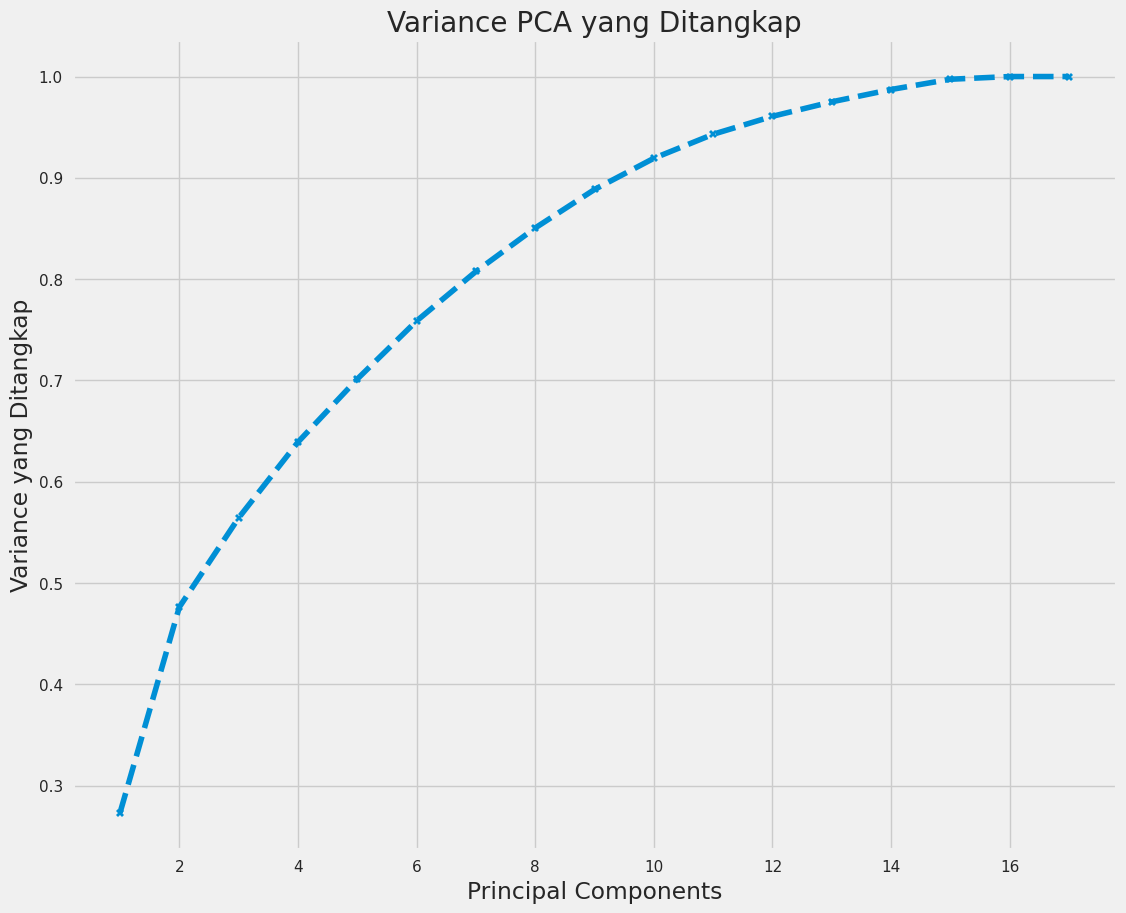

In [160]:
#Visualisai Principal Components Variance untuk melihat nilai dari components beserta besarnya variance yang ditangkap
plt.figure(figsize=(12,10))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='X', linestyle='--', )
plt.title('Variance PCA yang Ditangkap')
plt.xlabel('Principal Components')
plt.ylabel('Variance yang Ditangkap')
plt.show()


Dari visualisasi, didapatkan cukup banyak komponen, dan seperti algoritma KMeans, tidak terdapat crystalized cutoff. Kemudian kami mengatur nilai standar pada variance 80% dengan menggunakan 7 componets

- Menjalankan ulang PCA dengan nilai principal components yang sudah dipilih

In [162]:
pca = PCA(n_components=7, random_state = 42)
pca.fit(df_train)
pca.components_

array([[ 0.10165019,  0.12034183,  0.41159489,  0.34636129,  0.33678433,
        -0.02288918,  0.32124036,  0.29449865,  0.27449944, -0.08863337,
        -0.0482138 ,  0.39062359,  0.21189026,  0.26645796,  0.06322844,
         0.13184064,  0.08088189],
       [ 0.40383423,  0.13137843,  0.04011352,  0.06199644, -0.01911041,
         0.43900798, -0.19112653, -0.01850774, -0.17884616,  0.43410363,
         0.41961856, -0.02009449,  0.23806214,  0.25676292,  0.16906853,
        -0.19005353, -0.00437502],
       [-0.16146266, -0.42277948,  0.25733047,  0.39084508, -0.10951253,
        -0.02327666, -0.37161678,  0.1155876 , -0.46986241, -0.1050592 ,
        -0.11057764, -0.07612238,  0.10087067,  0.27735167, -0.23434717,
         0.12637544, -0.06630097],
       [ 0.27954623,  0.15570767,  0.04134278,  0.08444827, -0.05741469,
        -0.25651953, -0.19413186,  0.03381425, -0.2244726 , -0.26447488,
        -0.32820252, -0.02055162,  0.13150278, -0.11240049,  0.39303641,
        -0.41982069

In [163]:
#membuat DataFrame yang akan memiliki nilai principal component untuk semua sampel.
pca_df = pd.DataFrame(data = pca.components_, columns = df.columns.values,
                      index = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'])
pca_df

Saldo   FrekuensiSaldo  Pembelian  PembelianOneoff  PembelianAngsuran  \
PCA1  0.101650     0.120342     0.411595      0.346361          0.336784        
PCA2  0.403834     0.131378     0.040114      0.061996         -0.019110        
PCA3 -0.161463    -0.422779     0.257330      0.390845         -0.109513        
PCA4  0.279546     0.155708     0.041343      0.084448         -0.057415        
PCA5  0.050395    -0.477251     0.027012     -0.161709          0.360932        
PCA6  0.042671     0.020250     0.181002      0.179778          0.097680        
PCA7 -0.254068     0.100334     0.200024      0.120463          0.251713        

      PenarikanTunai  FrekuensiPembelian  FrekuensiPembelianOneoff  \
PCA1    -0.022889          0.321240               0.294499           
PCA2     0.439008         -0.191127              -0.018508           
PCA3    -0.023277         -0.371617               0.115588           
PCA4    -0.256520         -0.194132               0.033814           
PCA5     0.098534         -0.099310              -0.540374           
PCA6    -0.144487         -0.048185              -0.006765           
PCA7    -0.048777         -0.150398              -0.280850           

      FrekuensiPembelianAngsuran  FrekuensiPenarikanTunai  PenarikanTunaiTRX  \
PCA1           0.274499                 -0.088633             -0.048214        
PCA2          -0.178846                  0.434104              0.419619        
PCA3          -0.469862                 -0.105059             -0.110578        
PCA4          -0.224473                 -0.264475             -0.328203        
PCA5           0.177403                 -0.145128             -0.083060        
PCA6          -0.048037                  0.056915             -0.065530        
PCA7           0.038346                  0.144564              0.199018        

      PembelianTRX  BatasKredit  Pembayaran  MinimalPembayaran  \
PCA1    0.390624     0.211890     0.266458       0.063228        
PCA2   -0.020094     0.238062     0.256763       0.169069        
PCA3   -0.076122     0.100871     0.277352      -0.234347        
PCA4   -0.020552     0.131503    -0.112400       0.393036        
PCA5   -0.036704     0.087387     0.201621       0.413225        
PCA6    0.100059    -0.319942    -0.114258       0.292557        
PCA7    0.109797    -0.557151     0.156323      -0.201212        

      PembayaranFullPRC  JangkaWaktu  
PCA1      0.131841        0.080882    
PCA2     -0.190054       -0.004375    
PCA3      0.126375       -0.066301    
PCA4     -0.419821        0.437848    
PCA5      0.145388        0.002227    
PCA6     -0.350705       -0.745686    
PCA7     -0.301447        0.404207

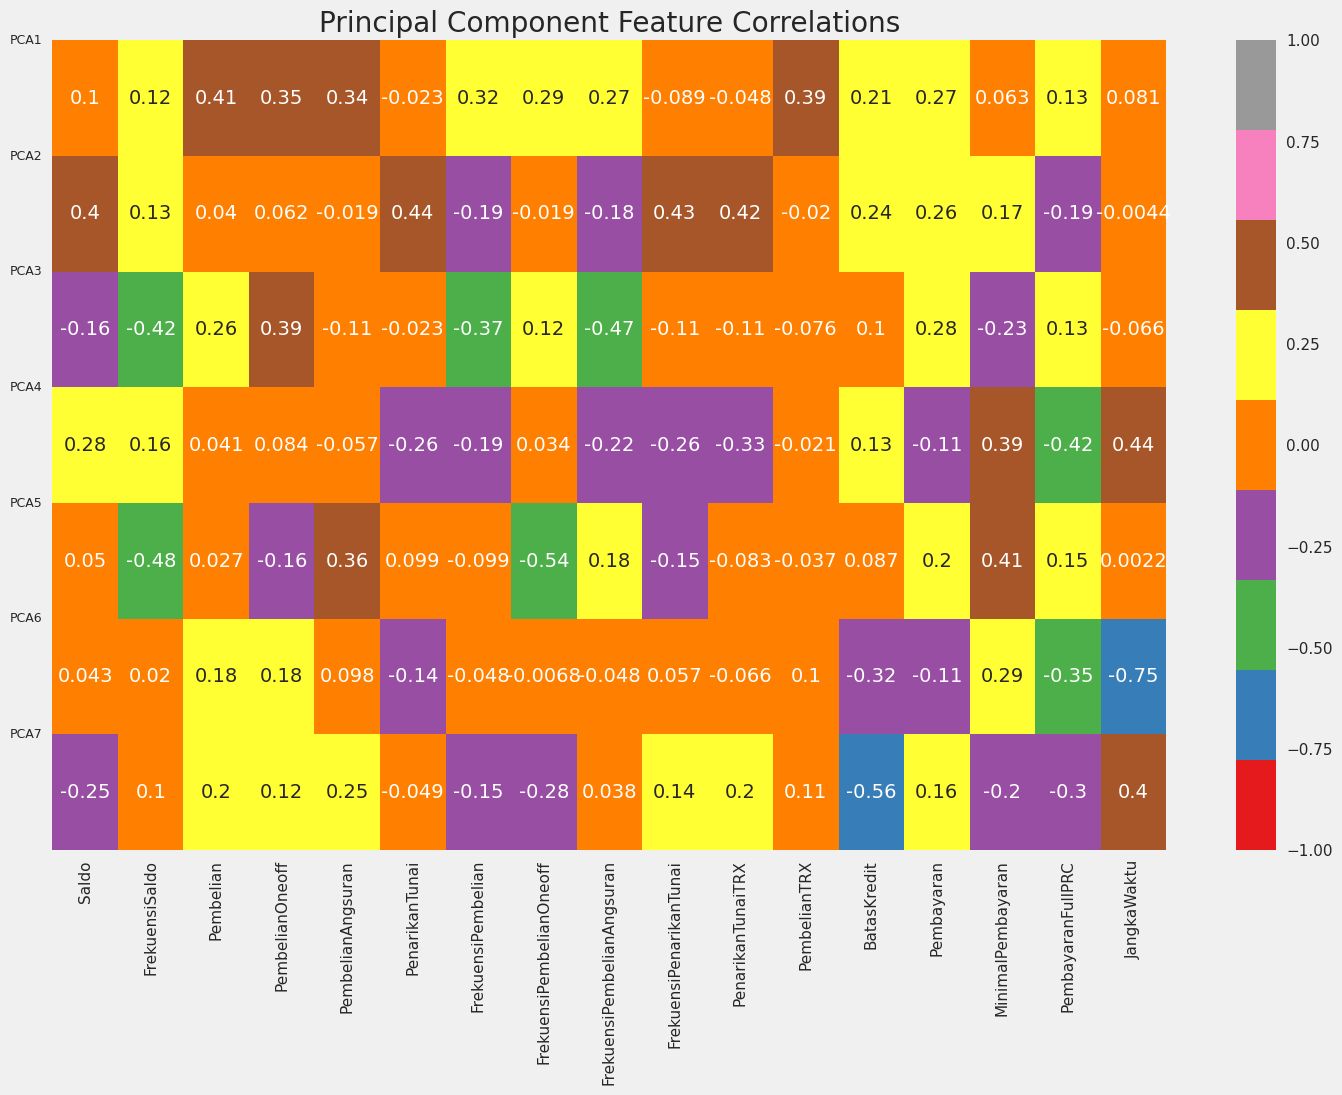

In [164]:
#Visualisasi components menggunakan heatmap
plt.figure(figsize=(16,10))
sns.heatmap(pca_df, vmin=-1, vmax=1, cmap='Set1', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'],rotation=0, fontsize=9)
plt.show()


dari hasil heatmap diketahui nilai korerasi tertiggi yaitu 0.44 yang dimiliki PCA2 yang berkorelasi dengan penarikanTunai dan PCA4 yang berkorelasi dengan JangkaWaktu



In [166]:
#- Melihat score PCA dari transform data yang sudah di standarisasi
pca_scores = pca.transform(df_train)
pca_scores

array([[-1.68376806, -1.07256915,  0.47724113, ...,  0.04312793,
         0.06970842,  0.82150335],
       [-1.13484551,  2.50873857,  0.60352928, ...,  0.66838992,
        -1.0962706 , -0.38595527],
       [ 0.96906031, -0.38348747,  0.09264602, ..., -2.1664757 ,
        -0.33293493, -1.54025127],
       ...,
       [-0.92848206, -1.80772339, -0.46489297, ...,  0.2191015 ,
         2.98569758, -1.40510662],
       [-2.33744226, -0.65344385,  0.97683511, ..., -0.08681624,
         3.18560017, -0.97654848],
       [-0.55757804, -0.40028104,  1.02684978, ..., -1.45893545,
         3.67018753, -1.41864857]])

In [167]:
#melihat dimensi PCA score
pca_scores.shape

(8949, 7)

In [168]:
#Melakukan clustering ulang pada data component PCA yang sudah diubah dengan menggunakan KMeans
wcss = []
for i in range(1, 18):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++')
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

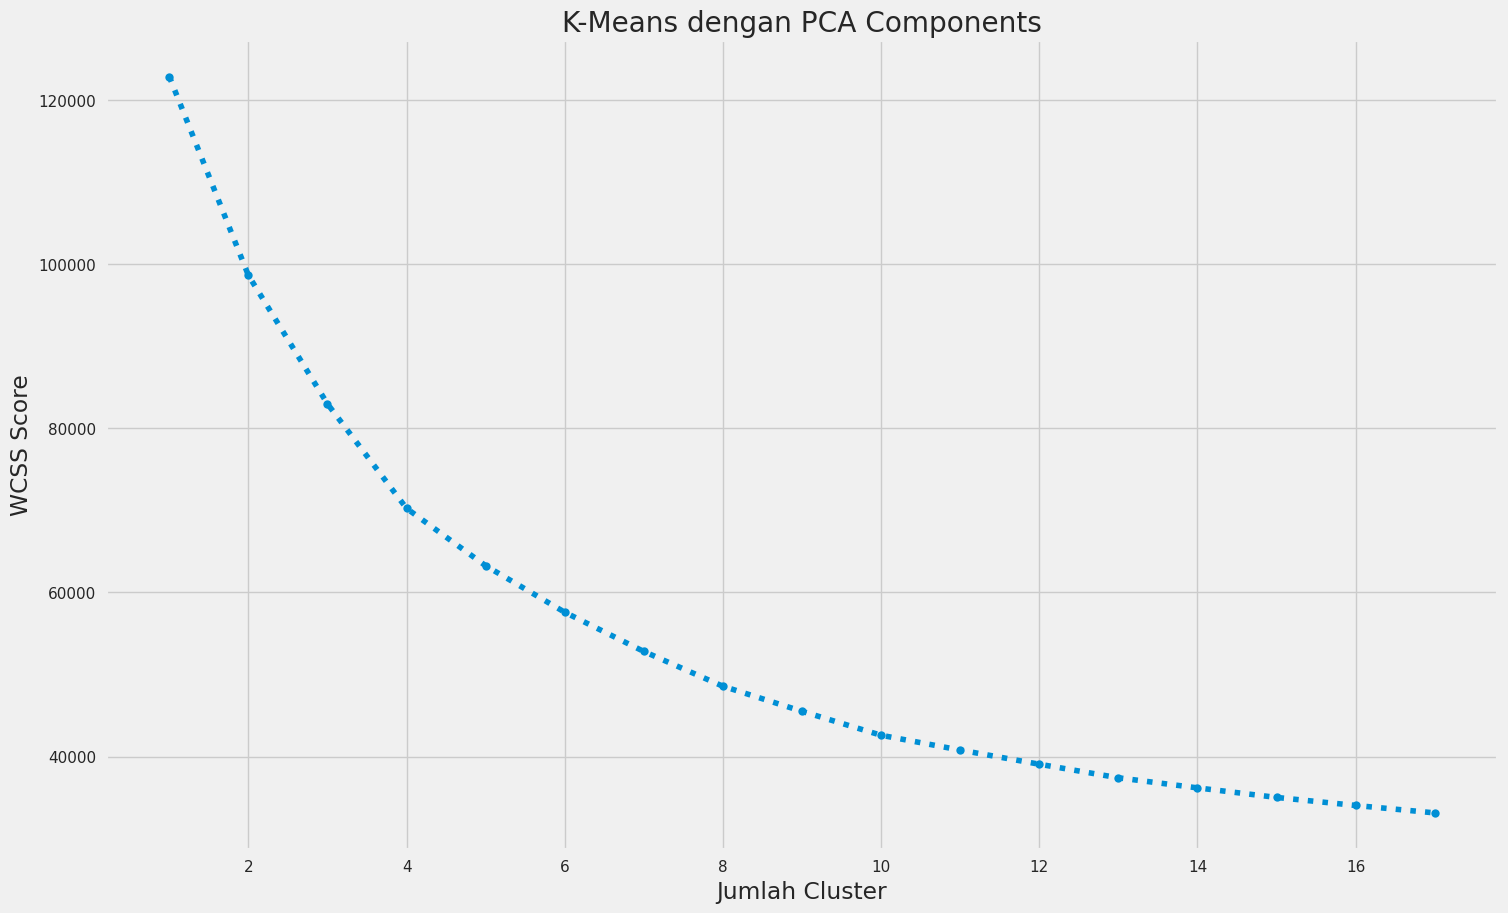

In [169]:
#Mencari jumlah cluster yang cocok dengan menggunakan elbow method
plt.figure(figsize=(16,10))
plt.plot(range(1, 18), wcss, marker='o', linestyle='dotted')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS Score')
plt.title('K-Means dengan PCA Components')
plt.show()

Berdasarkan output, didapatkan jumlah cluster dimulai dari 4 dan seterusnya memiliki nilai atau jarak yang optimal. Namun disini kami memilih nilai cluster sebanyak 4 dengan memperhatikan computation cost sambil menentukan jumlah cluster. Jika kita menambah jumlah cluster, maka computation cost juga akan meningkat. Jadi, jika kita tidak memiliki sumber daya komputasi yang tinggi, disarankan untuk memilih jumlah cluster yang lebih sedikit.


In [170]:
#Melatih model untuk Kmeans PCA dengan n_cluster sebanyak 4
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

In [171]:
#Menambahakan nilai segment KMeans PCA dan nilai component pada dataframe dengan membuat kolom baru
pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
pca_kmeans.columns.values[-7:] = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7']

pca_kmeans['K-Means PCA Segment'] = kmeans_pca.labels_
pca_kmeans

Saldo     FrekuensiSaldo  Pembelian  PembelianOneoff  \
0       40.900749     0.818182        95.40          0.00       
1     3202.467416     0.909091         0.00          0.00       
2     2495.148862     1.000000       773.17        773.17       
3     1666.670542     0.636364      1499.00       1499.00       
4      817.714335     1.000000        16.00         16.00       
...           ...             ...        ...              ...   
8944    28.493517     1.000000       291.12          0.00       
8945    19.183215     1.000000       300.00          0.00       
8946    23.398673     0.833333       144.40          0.00       
8947    13.457564     0.833333         0.00          0.00       
8948   372.708075     0.666667      1093.25       1093.25       

      PembelianAngsuran  PenarikanTunai  FrekuensiPembelian  \
0           95.40             0.000000        0.166667        
1            0.00          6442.945483        0.000000        
2            0.00             0.000000        1.000000        
3            0.00           205.788017        0.083333        
4            0.00             0.000000        0.083333        
...                 ...             ...                 ...   
8944       291.12             0.000000        1.000000        
8945       300.00             0.000000        1.000000        
8946       144.40             0.000000        0.833333        
8947         0.00            36.558778        0.000000        
8948         0.00           127.040008        0.666667        

      FrekuensiPembelianOneoff  FrekuensiPembelianAngsuran  \
0             0.000000                   0.083333            
1             0.000000                   0.000000            
2             1.000000                   0.000000            
3             0.083333                   0.000000            
4             0.083333                   0.000000            
...                        ...                         ...   
8944          0.000000                   0.833333            
8945          0.000000                   0.833333            
8946          0.000000                   0.666667            
8947          0.000000                   0.000000            
8948          0.666667                   0.000000            

      FrekuensiPenarikanTunai  PenarikanTunaiTRX  PembelianTRX  BatasKredit  \
0            0.000000                  0                2         1000.0      
1            0.250000                  4                0         7000.0      
2            0.000000                  0               12         7500.0      
3            0.083333                  1                1         7500.0      
4            0.000000                  0                1         1200.0      
...                       ...                ...           ...          ...   
8944         0.000000                  0                6         1000.0      
8945         0.000000                  0                6         1000.0      
8946         0.000000                  0                5         1000.0      
8947         0.166667                  2                0          500.0      
8948         0.333333                  2               23         1200.0      

      Pembayaran   MinimalPembayaran  PembayaranFullPRC  JangkaWaktu  \
0      201.802084      139.509787         0.000000           12        
1     4103.032597     1072.340217         0.222222           12        
2      622.066742      627.284787         0.000000           12        
3        0.000000      312.343947         0.000000           12        
4      678.334763      244.791237         0.000000           12        
...           ...                ...                ...          ...   
8944   325.594462       48.886365         0.500000            6        
8945   275.861322      312.343947         0.000000            6        
8946    81.270775       82.418369         0.250000            6        
8947    52.549959       55.755628         0.250000       

Sekarang dataframe memiliki original features, jumlah PCA Component tetap, dan kolom label segmen yang sesuai dengan clustering KMeans yang diterapkan ke jumlah grup yang tetap

In [172]:
#Melakukan grouping berdasarkan segmennya dan melihat mean dari semua feaures dan PCA Components
pca_kmeans_freq = pca_kmeans.groupby(['K-Means PCA Segment']).mean()
pca_kmeans_freq

Saldo     FrekuensiSaldo   Pembelian   \
K-Means PCA Segment                                             
0                     972.410204     0.943476     1375.721947   
1                    4550.401847     0.968417      494.239444   
2                     989.340046     0.787844      278.232349   
3                    4006.524788     0.985191     9205.021590   

                     PembelianOneoff  PembelianAngsuran  PenarikanTunai  \
K-Means PCA Segment                                                       
0                       684.098777        691.808478        215.182858    
1                       312.311866        182.010777       4491.666376    
2                       211.705685         66.860604        568.453800    
3                      6193.524841       3013.616890        815.711235    

                     FrekuensiPembelian  FrekuensiPembelianOneoff  \
K-Means PCA Segment                                                 
0                         0.896137               0.319585           
1                         0.282857               0.136082           
2                         0.185474               0.087618           
3                         0.944823               0.748223           

                     FrekuensiPembelianAngsuran  FrekuensiPenarikanTunai  \
K-Means PCA Segment                                                        
0                             0.722279                  0.043045           
1                             0.182636                  0.481168           
2                             0.093925                  0.111291           
3                             0.783746                  0.081004           

                     PenarikanTunaiTRX  PembelianTRX   BatasKredit  \
K-Means PCA Segment                                                  
0                         0.805045        24.349555    4412.424407   
1                        14.153846         7.567103    7498.571641   
2                         2.048601         3.112666    3251.976763   
3                         2.547703        97.763251   10385.689046   

                     Pembayaran   MinimalPembayaran  PembayaranFullPRC  \
K-Means PCA Segment                                                      
0                    1446.520639      644.042779         0.274101        
1                    3466.219932     1968.890214         0.035717        
2                     958.631943      565.875965         0.079776        
3                    8818.609864     2403.231293         0.294604        

                     JangkaWaktu    PCA1      PCA2      PCA3      PCA4    \
K-Means PCA Segment                                                        
0                     11.626113   1.129589 -1.076890 -0.689037 -0.265410   
1                     11.389525  -0.483997  3.470420 -0.396001 -0.400605   
2                     11.436426  -1.313498 -0.231762  0.590358  0.306278   
3                     11.957597   7.547414  1.174781  1.416426  0.481259   

                       PCA5      PCA6      PCA7    
K-Means PCA Segment                                
0                   -0.143719 -0.151946 -0.162223  
1                    0.033596 -0.236367 -0.260731  
2                    0.079362  0.137905  0.167408  
3                    0.423878  0.844778  0.647653

Setelah menerapkan ulang model KMeans, kemudian dengan PCA Component kami harus memilih nama yang sesuai lagi. Atribut akan mengikuti pola yang sama dengan data tanpa PCA Component, sehingga kami memilih untuk menggunakan nama segmen yang sama seperti sebelumnya di sini.

In [173]:
#Melihat Perolehan jumlah observasi (pengamatan) dan proporsi observasi (pengamatan) dalam setiap segmen
pca_kmeans_freq['JumlahPengamatan'] = pca_kmeans[['K-Means PCA Segment', 'Saldo']].groupby(['K-Means PCA Segment']).count()
pca_kmeans_freq['ProporsiPengamatan'] = pca_kmeans_freq['JumlahPengamatan'] / pca_kmeans_freq['JumlahPengamatan'].sum()
pca_kmeans_freq = pca_kmeans_freq.rename({0:'Pengguna Level Tengah',
                                          1:'Pengguna dengan Penarikan Tunai Tinggi',
                                          2:'Pengguna Kredit Hemat',
                                          3:'Penggnua dengan Pembelian Kredit Tinggi'})
pca_kmeans_freq

Saldo     FrekuensiSaldo  \
K-Means PCA Segment                                                    
Pengguna Level Tengah                     972.410204     0.943476      
Pengguna dengan Penarikan Tunai Tinggi   4550.401847     0.968417      
Pengguna Kredit Hemat                     989.340046     0.787844      
Penggnua dengan Pembelian Kredit Tinggi  4006.524788     0.985191      

                                          Pembelian   PembelianOneoff  \
K-Means PCA Segment                                                     
Pengguna Level Tengah                    1375.721947     684.098777     
Pengguna dengan Penarikan Tunai Tinggi    494.239444     312.311866     
Pengguna Kredit Hemat                     278.232349     211.705685     
Penggnua dengan Pembelian Kredit Tinggi  9205.021590    6193.524841     

                                         PembelianAngsuran  PenarikanTunai  \
K-Means PCA Segment                                                          
Pengguna Level Tengah                        691.808478        215.182858    
Pengguna dengan Penarikan Tunai Tinggi       182.010777       4491.666376    
Pengguna Kredit Hemat                         66.860604        568.453800    
Penggnua dengan Pembelian Kredit Tinggi     3013.616890        815.711235    

                                         FrekuensiPembelian  \
K-Means PCA Segment                                           
Pengguna Level Tengah                         0.896137        
Pengguna dengan Penarikan Tunai Tinggi        0.282857        
Pengguna Kredit Hemat                         0.185474        
Penggnua dengan Pembelian Kredit Tinggi       0.944823        

                                         FrekuensiPembelianOneoff  \
K-Means PCA Segment                                                 
Pengguna Level Tengah                            0.319585           
Pengguna dengan Penarikan Tunai Tinggi           0.136082           
Pengguna Kredit Hemat                            0.087618           
Penggnua dengan Pembelian Kredit Tinggi          0.748223           

                                         FrekuensiPembelianAngsuran  \
K-Means PCA Segment                                                   
Pengguna Level Tengah                             0.722279            
Pengguna dengan Penarikan Tunai Tinggi            0.182636            
Pengguna Kredit Hemat                             0.093925            
Penggnua dengan Pembelian Kredit Tinggi           0.783746            

                                         FrekuensiPenarikanTunai  \
K-Means PCA Segment                                                
Pengguna Level Tengah                           0.043045           
Pengguna dengan Penarikan Tunai Tinggi          0.481168           
Pengguna Kredit Hemat                           0.111291           
Penggnua dengan Pembelian Kredit Tinggi         0.081004           

                                         PenarikanTunaiTRX  PembelianTRX  \
K-Means PCA Segment                                                        
Pengguna Level Tengah                         0.805045        24.349555    
Pengguna dengan Penarikan Tunai Tinggi       14.153846         7.567103    
Pengguna Kredit Hemat                         2.048601         3.112666    
Penggnua dengan Pembelian Kredit Tinggi       2.547703        97.763251    

                                          BatasKredit  Pembayaran   \
K-Means PCA Segment                                                  
Pengguna Level Tengah                     4412.424407  1446.520639   
Pengguna dengan Penarikan Tunai Tinggi    7498.571641  3466.219932   
Pengguna Kredit Hemat                     3251.976763   958.631943   
Penggnua dengan Pembelian Kredit Tinggi  10385.689046  8818.609864   

                                         MinimalPembayaran  PembayaranFullPRC  \
K-Means PCA Segment                                                             
Pengguna Level Tengah            

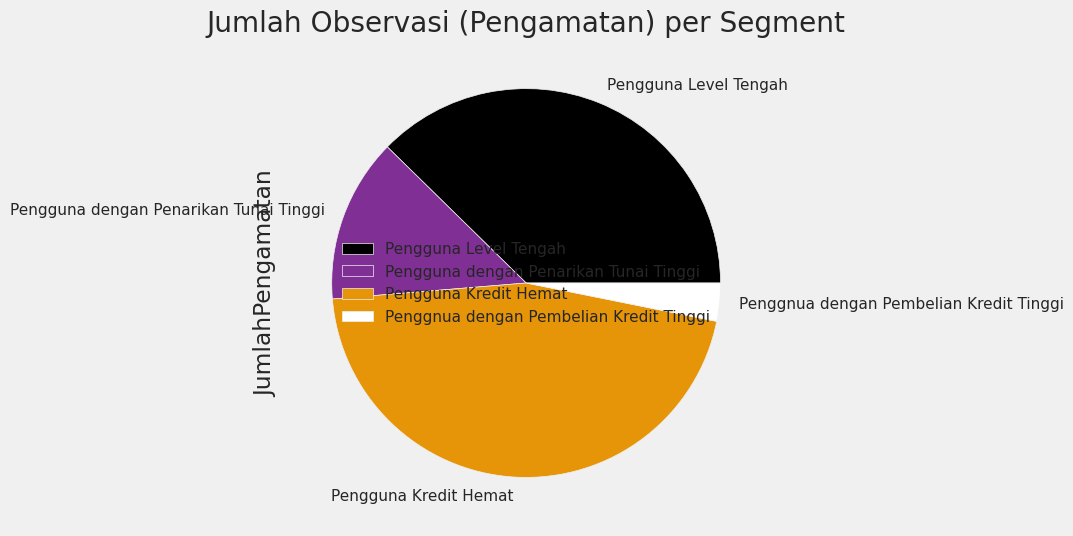

In [174]:
#Visualisasi Jumlah Observasi (Pengamatan) per segment
pca_kmeans_freq.plot.pie(y='JumlahPengamatan', figsize=(6, 6), cmap='CMRmap')
plt.legend(loc='center')
plt.title('Jumlah Observasi (Pengamatan) per Segment')
plt.show()

Dari output terlihat bahwa segment memiliki jumlah record yang berbeda. Urutan grup juga diubah ketika memasukkan PCA Component berdasarkan KMeans  clustering.


In [175]:
#Membuat visualisasi plot beberapa PCA Component satu sama lain dengan memberi warna pada segmen KMeans
pca_kmeans['Legend'] = pca_kmeans['K-Means PCA Segment'].map({0:'Pengguna Level Tengah',
                                                              1:'Pengguna dengan Penarikan Tunai Tinggi',
                                                              2:'Pengguna Kredit Hemat',
                                                              3:'Pengguna dengan Pembelian Kredit Tinggi'})

Karena terdapat beberapa PCA Component, jadi akan sedikit rumit untuk merencanakan dan menyimpan semua kemungkinan kombinasi komponen di sini. maka kami akan memplot komponen yang dipilih.


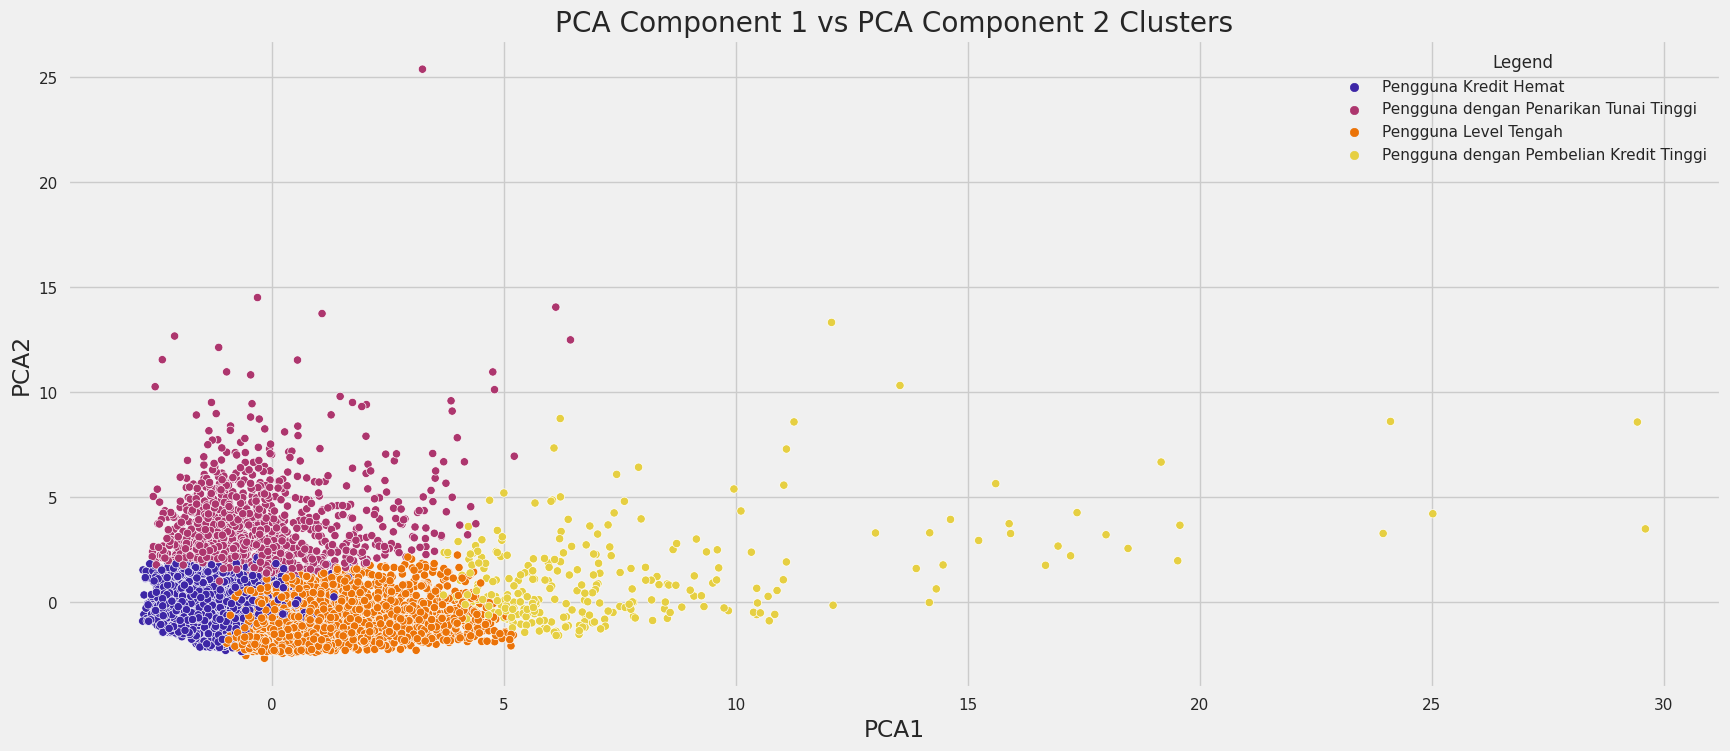

<Figure size 800x550 with 0 Axes>

In [177]:
#plotting PCA Component
X = pca_kmeans['PCA1']
Y = pca_kmeans['PCA2']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 1 vs PCA Component 2 Clusters')
plt.show()

plt.savefig("PCA Component 1 vs PCA Component 2 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

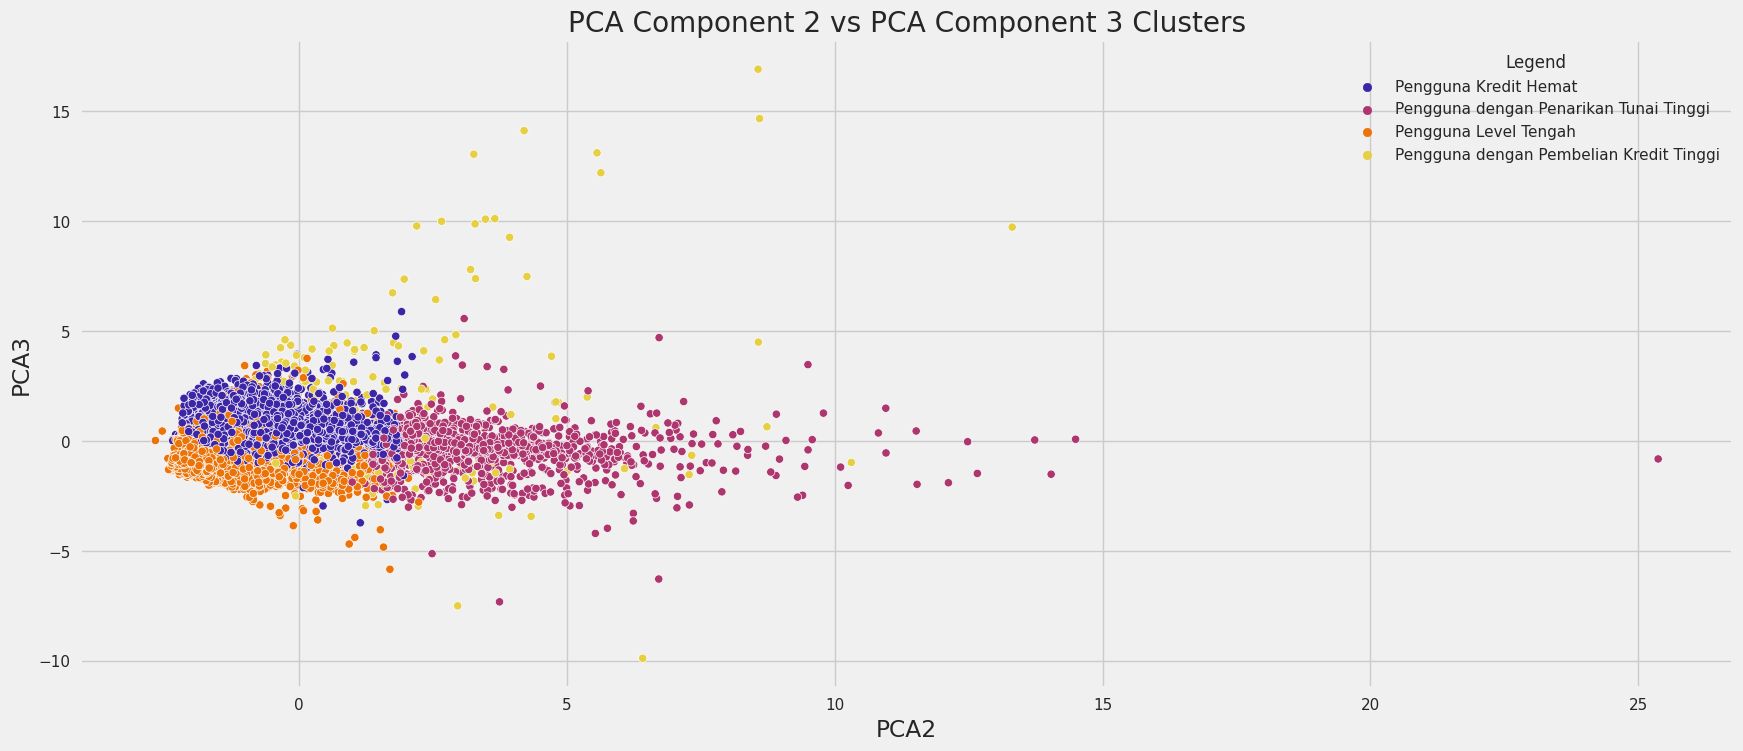

<Figure size 800x550 with 0 Axes>

In [178]:
X = pca_kmeans['PCA2']
Y = pca_kmeans['PCA3']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 2 vs PCA Component 3 Clusters')
plt.show()

plt.savefig("PCA Component 2 vs PCA Component 3 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

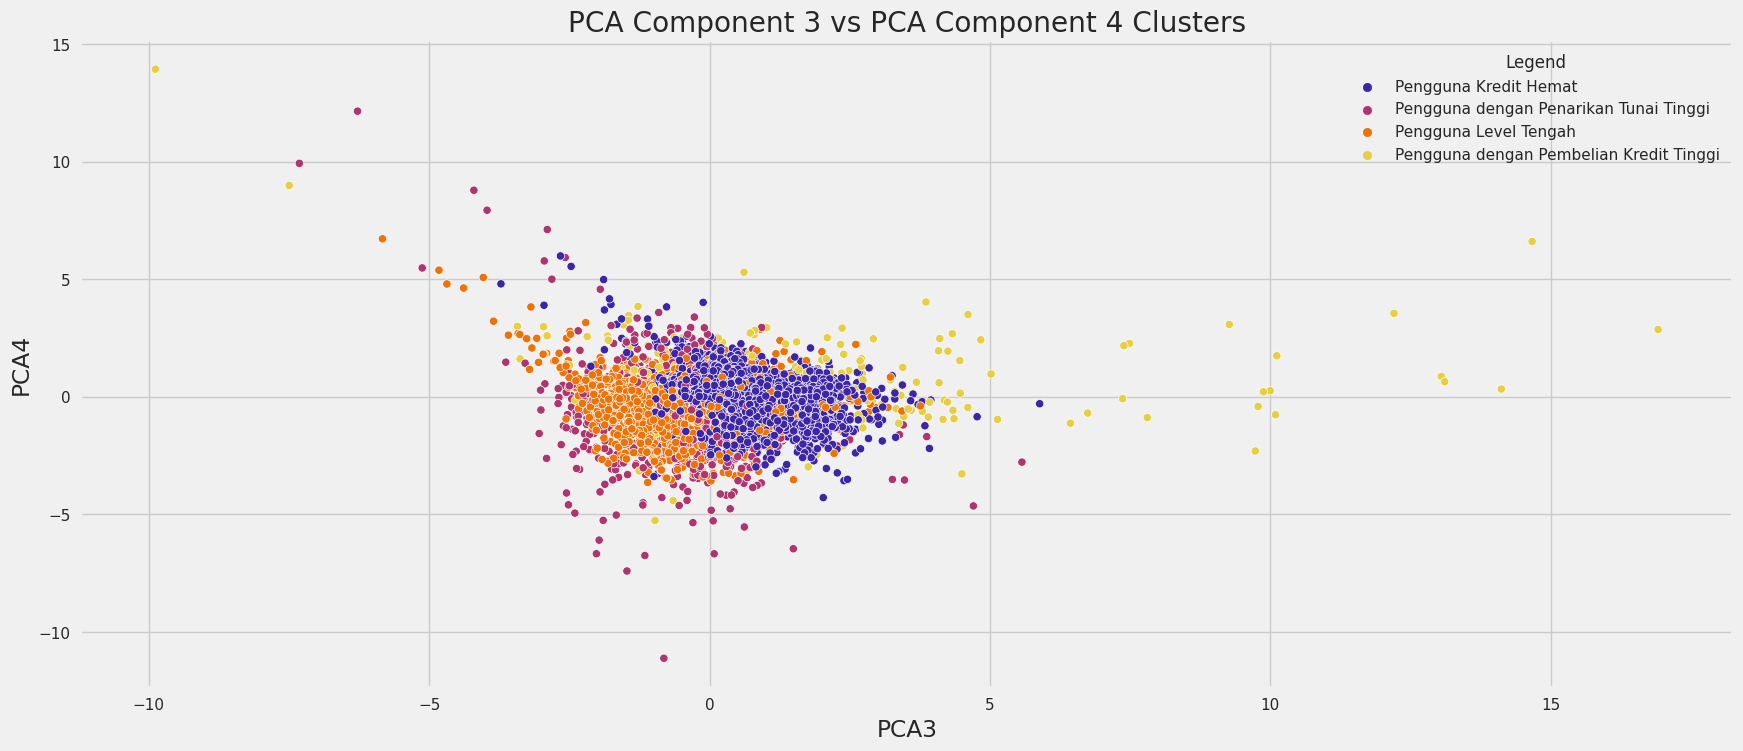

<Figure size 800x550 with 0 Axes>

In [179]:
X = pca_kmeans['PCA3']
Y = pca_kmeans['PCA4']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 3 vs PCA Component 4 Clusters')
plt.show()

plt.savefig("PCA Component 3 vs PCA Component 4 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

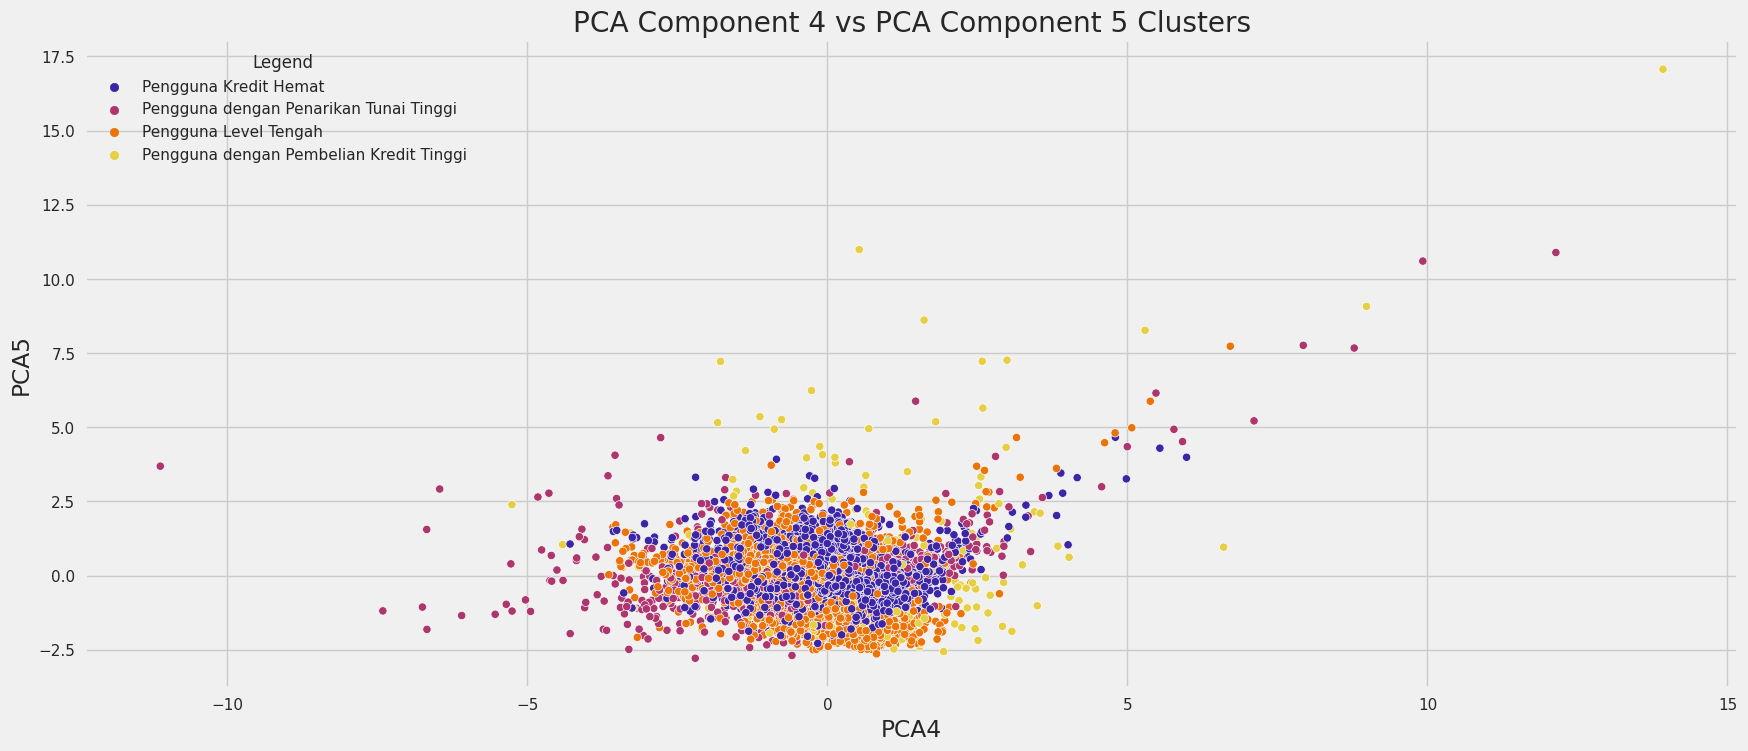

<Figure size 800x550 with 0 Axes>

In [180]:
X = pca_kmeans['PCA4']
Y = pca_kmeans['PCA5']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 4 vs PCA Component 5 Clusters')
plt.show()

plt.savefig("PCA Component 4 vs PCA Component 5 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

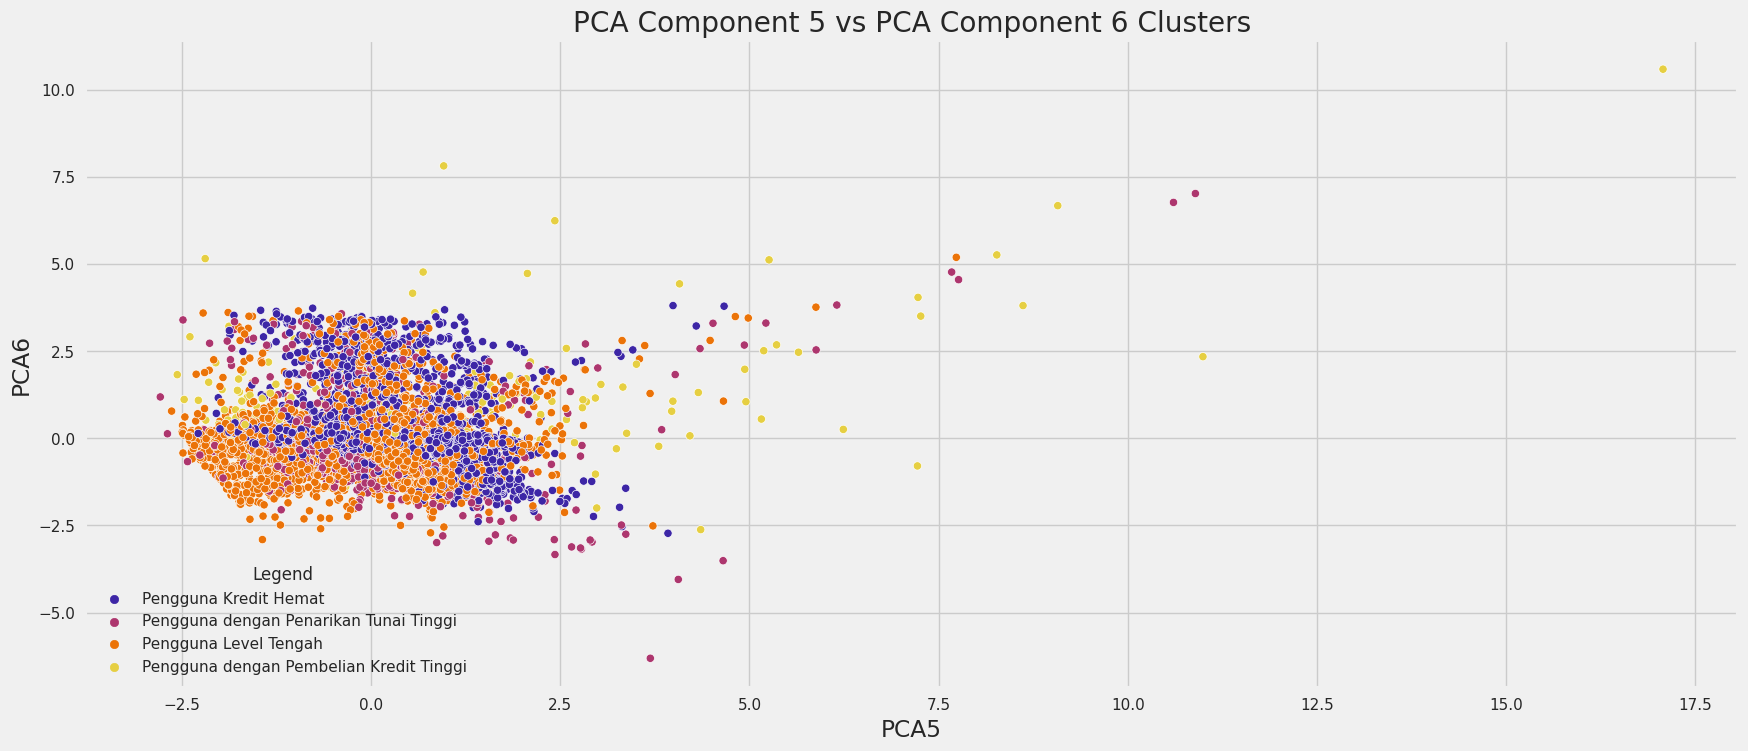

<Figure size 800x550 with 0 Axes>

In [181]:
X = pca_kmeans['PCA5']
Y = pca_kmeans['PCA6']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 5 vs PCA Component 6 Clusters')
plt.show()

plt.savefig("PCA Component 5 vs PCA Component 6 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

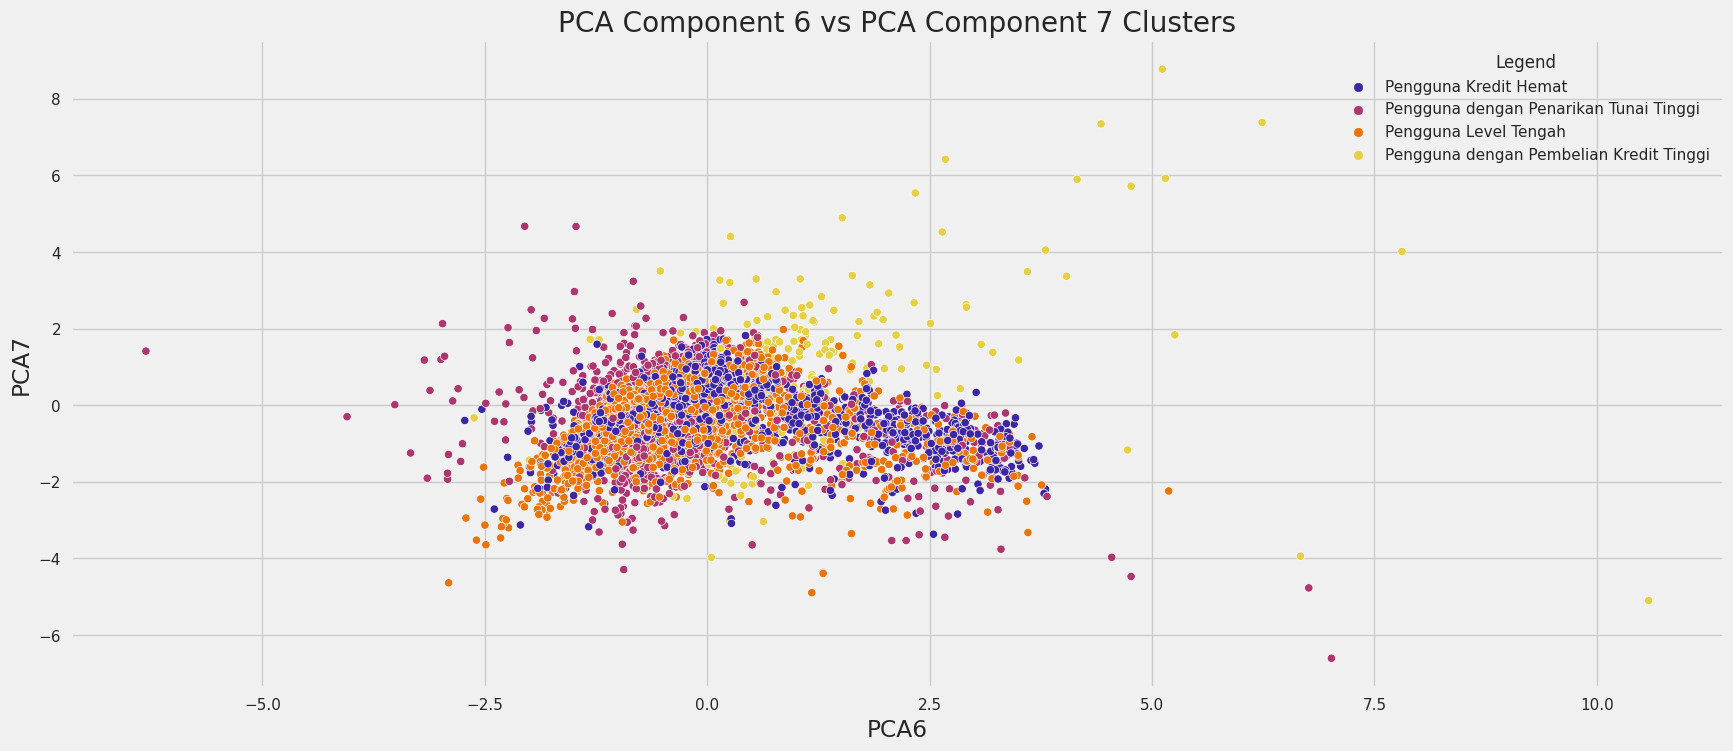

<Figure size 800x550 with 0 Axes>

In [182]:
X = pca_kmeans['PCA6']
Y = pca_kmeans['PCA7']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 6 vs PCA Component 7 Clusters')
plt.show()

plt.savefig("PCA Component 6 vs PCA Component 7 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

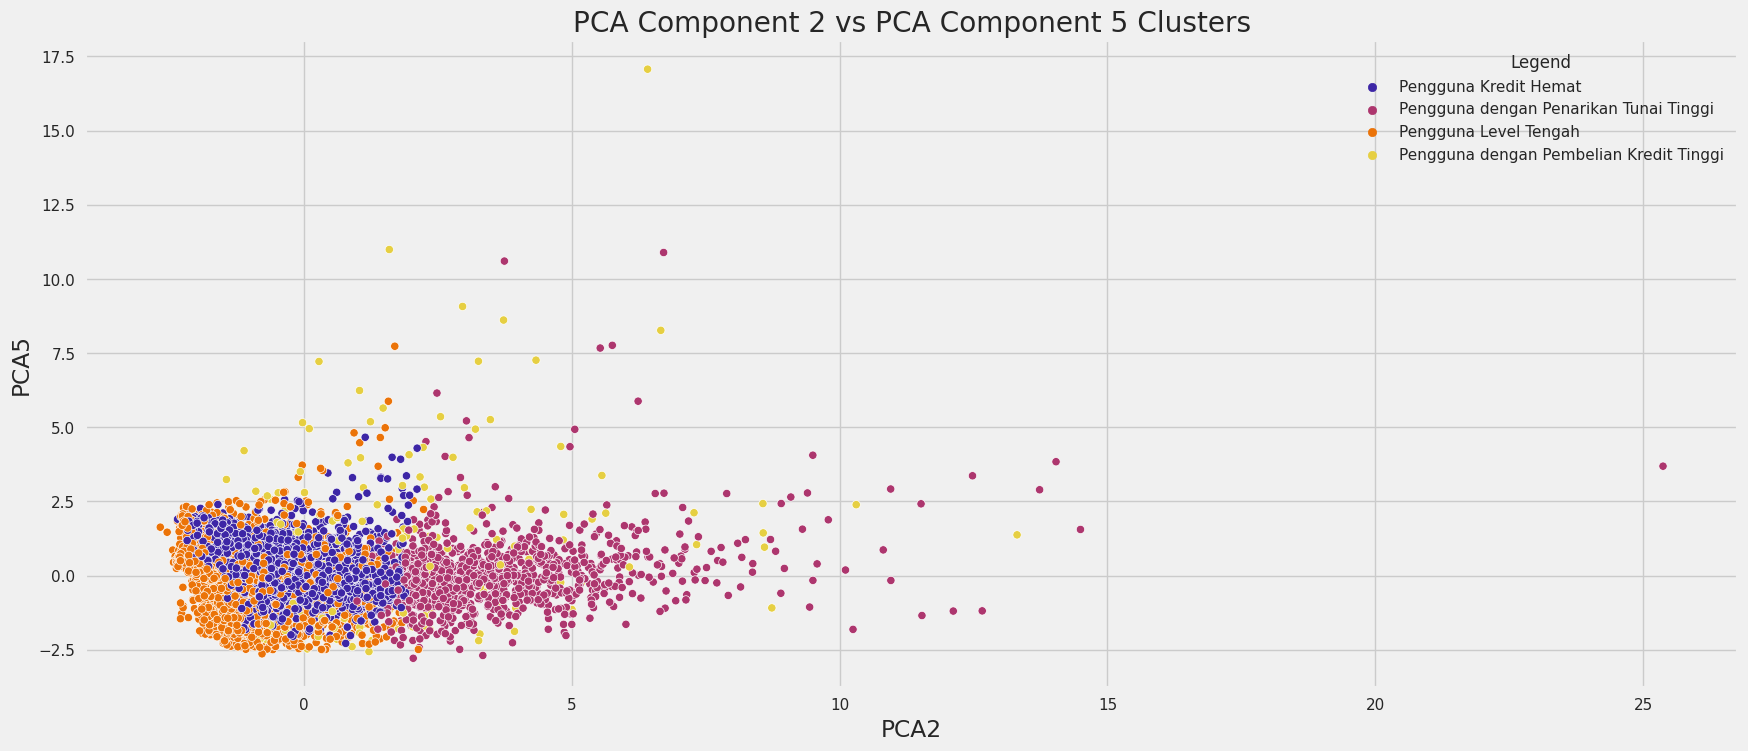

<Figure size 800x550 with 0 Axes>

In [183]:
X = pca_kmeans['PCA2']
Y = pca_kmeans['PCA5']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 2 vs PCA Component 5 Clusters')
plt.show()

plt.savefig("PCA Component 2 vs PCA Component 5 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

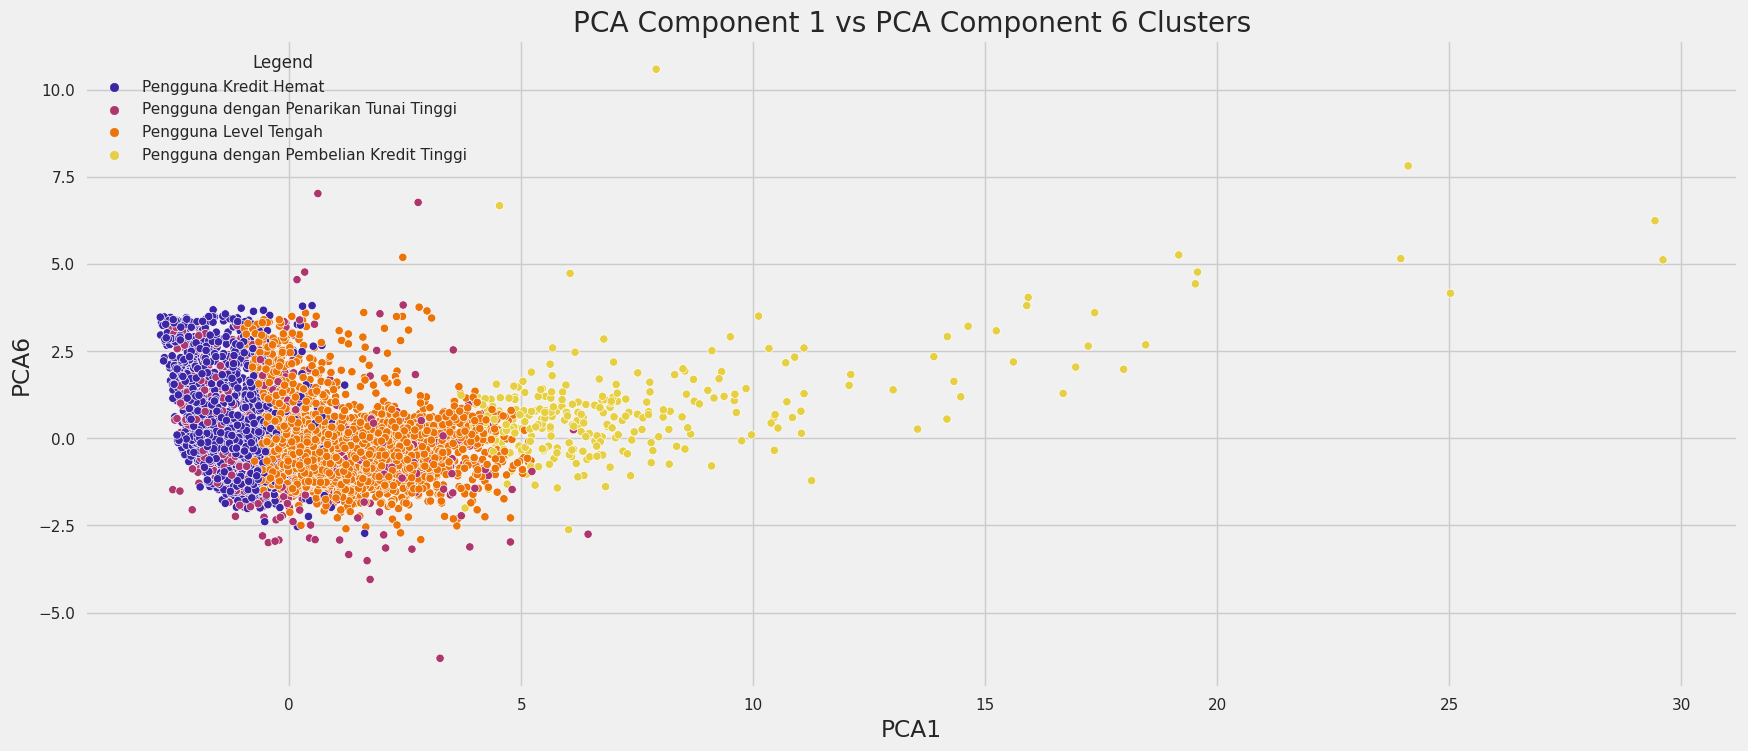

<Figure size 800x550 with 0 Axes>

In [184]:
X = pca_kmeans['PCA1']
Y = pca_kmeans['PCA6']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 1 vs PCA Component 6 Clusters')
plt.show()

plt.savefig("PCA Component 1 vs PCA Component 6 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

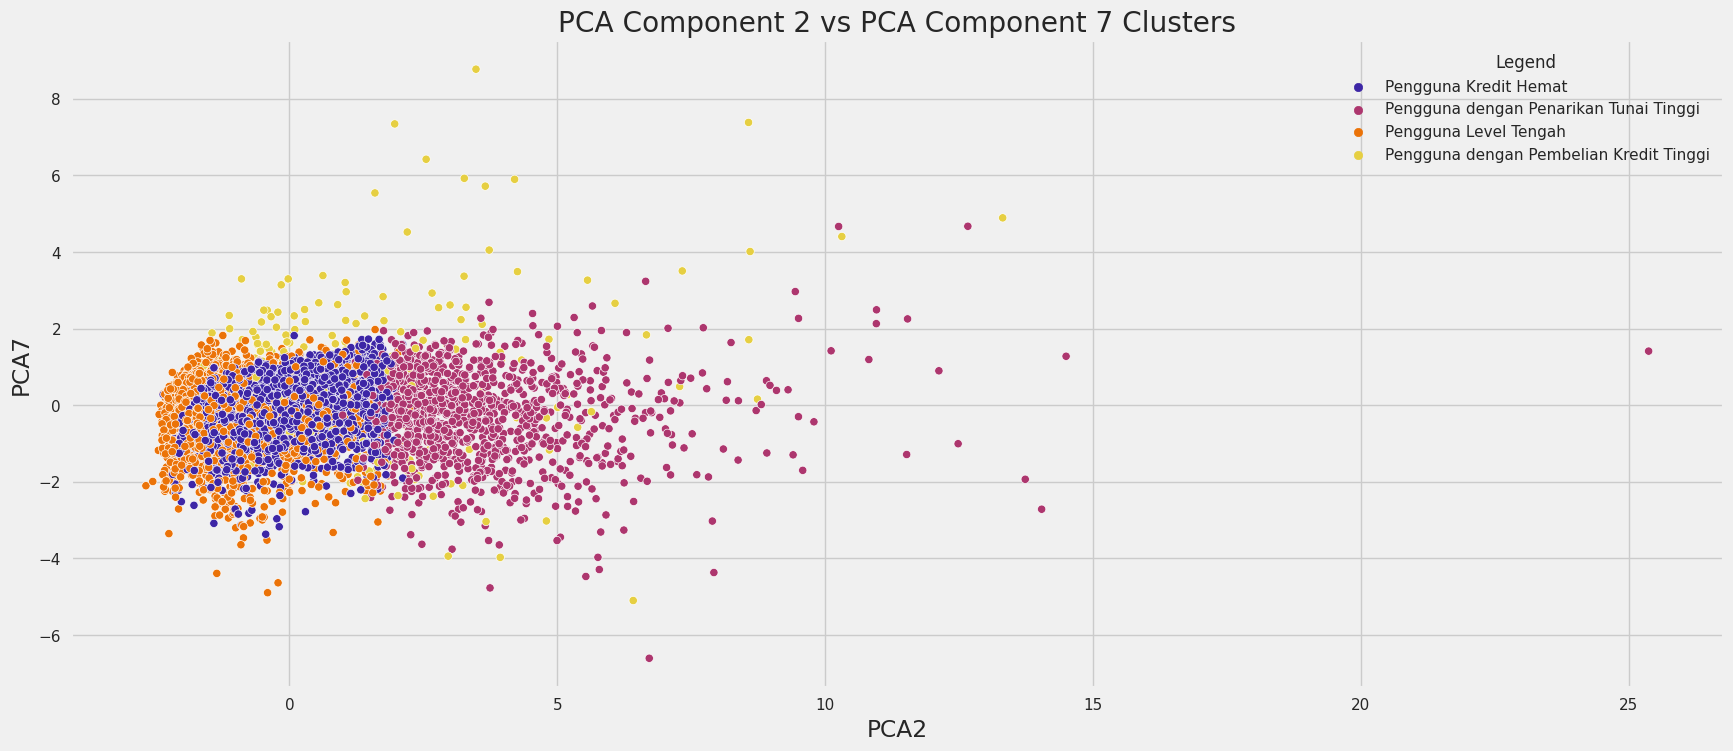

<Figure size 800x550 with 0 Axes>

In [185]:
X = pca_kmeans['PCA2']
Y = pca_kmeans['PCA7']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 2 vs PCA Component 7 Clusters')
plt.show()

plt.savefig("PCA Component 2 vs PCA Component 7 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### UMAP applikasi

melihatan percobaan 7 komponen jika ingin mencapai jumlah variance sebesar 80%

In [186]:
df.head()

Saldo     FrekuensiSaldo  Pembelian  PembelianOneoff  PembelianAngsuran  \
0    40.900749     0.818182        95.40          0.00            95.4          
1  3202.467416     0.909091         0.00          0.00             0.0          
2  2495.148862     1.000000       773.17        773.17             0.0          
3  1666.670542     0.636364      1499.00       1499.00             0.0          
4   817.714335     1.000000        16.00         16.00             0.0          

   PenarikanTunai  FrekuensiPembelian  FrekuensiPembelianOneoff  \
0       0.000000        0.166667               0.000000           
1    6442.945483        0.000000               0.000000           
2       0.000000        1.000000               1.000000           
3     205.788017        0.083333               0.083333           
4       0.000000        0.083333               0.083333           

   FrekuensiPembelianAngsuran  FrekuensiPenarikanTunai  PenarikanTunaiTRX  \
0           0.083333                  0.000000                  0           
1           0.000000                  0.250000                  4           
2           0.000000                  0.000000                  0           
3           0.000000                  0.083333                  1           
4           0.000000                  0.000000                  0           

   PembelianTRX  BatasKredit  Pembayaran   MinimalPembayaran  \
0        2         1000.0      201.802084      139.509787      
1        0         7000.0     4103.032597     1072.340217      
2       12         7500.0      622.066742      627.284787      
3        1         7500.0        0.000000      312.343947      
4        1         1200.0      678.334763      244.791237      

   PembayaranFullPRC  JangkaWaktu  
0      0.000000           12       
1      0.222222           12       
2      0.000000           12       
3      0.000000           12       
4      0.000000           12

In [187]:
#standarisasi data set
scaler = StandardScaler()
scaledDf = scaler.fit_transform(df)
scaledDf

array([[-0.73205404, -0.24988139, -0.4249337 , ..., -0.30242503,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , ...,  0.09745499,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601, ..., -0.09332864,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.18589504, -0.40200016, ..., -0.32689862,
         0.32912795, -4.12691899],
       [-0.74523857, -0.18589504, -0.4695839 , ..., -0.33832824,
         0.32912795, -4.12691899],
       [-0.57264377, -0.88976603,  0.0420915 , ..., -0.32438206,
        -0.52558844, -4.12691899]])